<a href="https://colab.research.google.com/github/AnshumanMohapatra11121999/DataScienceAndAI-/blob/main/DataVisualization_case_study_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#We will be learning this lesson through a case study. This will help you see how data visualisation can help you solve business problems

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
#Problem Statement:Build a feature ti boost visibility of promising apps in the google playstore
#proising apps are promoted in the recommendation sections

In [ ]:
'''
The Google Play Store team is working on a feature that will allow them to highlight the most promising apps. This analysis would now necessitate a basic understanding of the characteristics that make a high-performing app. You might pose questions like the following:

Does an app being larger or more expensive inevitably indicate that it will perform better than the others?
Is it true that a bigger number of instals indicates which app will get a higher rating than others?
'''
#we will learn to use data visualisation to answer these questions and derive corresponding insights.

'\nThe Google Play Store team is working on a feature that will allow them to highlight the most promising apps. This analysis would now necessitate a basic understanding of the characteristics that make a high-performing app. You might pose questions like the following:\n\nDoes an app being larger or more expensive inevitably indicate that it will perform better than the others?\nIs it true that a bigger number of instals indicates which app will get a higher rating than others?\n'

In [ ]:
pldf=pd.read_csv("/content/googleplaystore_v2.csv")

In [ ]:
pldf

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.000000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
#Create a backup for the dataset
pldfbackup=pldf

In [ ]:
#Question to be answered
"""Target Variable
In the world of machine learning, the target variable is defined as the variable or column in a data set whose value is to be predicted or analysed by using the other variables in the same data set.
For our case study, which of the following is the target variable?"""

#The answer:
'''
Ans-Rating
You want to look at the data to see what factors determine whether an app performs well or poorly in ratings.
As a result, the Rating column is the variable we want to focus on. To find the most essential indicators for high-performing apps, you will look at how the rating differs across different categories of other variables.
'''

'\nAns-Rating\nYou want to look at the data to see what factors determine whether an app performs well or poorly in ratings.\nAs a result, the Rating column is the variable we want to focus on. To find the most essential indicators for high-performing apps, you will look at how the rating differs across different categories of other variables.\n'

In [ ]:
pldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [ ]:
pldf.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


In [ ]:
pldf.value_counts()

,,,,,,,,,,,,,count
App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,
WatchESPN,SPORTS,4.1,288809,6600.000000,"10,000,000+",Free,0,Everyone,Sports,"September 27, 2017",2.5.1,4.4 and up,4
eBay: Buy & Sell this Summer - Discover Deals Now!,SHOPPING,4.4,2788923,21516.529524,"100,000,000+",Free,0,Teen,Shopping,"July 30, 2018",Varies with device,Varies with device,4
"CBS Sports App - Scores, News, Stats & Watch Live",SPORTS,4.3,91031,21516.529524,"5,000,000+",Free,0,Everyone,Sports,"August 4, 2018",Varies with device,5.0 and up,4
Google Keep,PRODUCTIVITY,4.4,691474,21516.529524,"100,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device,4
Nick,ENTERTAINMENT,4.2,123279,25000.000000,"10,000,000+",Free,0,Everyone 10+,Entertainment;Music & Video,"January 24, 2018",2.0.8,4.4 and up,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Driving Suv Toyota Car Simulator,FAMILY,3.7,187,54000.000000,"10,000+",Free,0,Everyone,Simulation,"November 12, 2017",1,4.0 and up,1
Driving Zone,GAME,4.2,51791,57000.000000,"1,000,000+",Free,0,Everyone,Racing,"June 6, 2018",1.53,4.1 and up,1
Driving n Parking School 2017,FAMILY,4.5,15,46000.000000,"1,000+",Free,0,Everyone,Simulation,"May 31, 2017",1.0,2.3 and up,1


In [ ]:
pldf.shape

(10841, 13)

# Data Handling and Cleaning – I

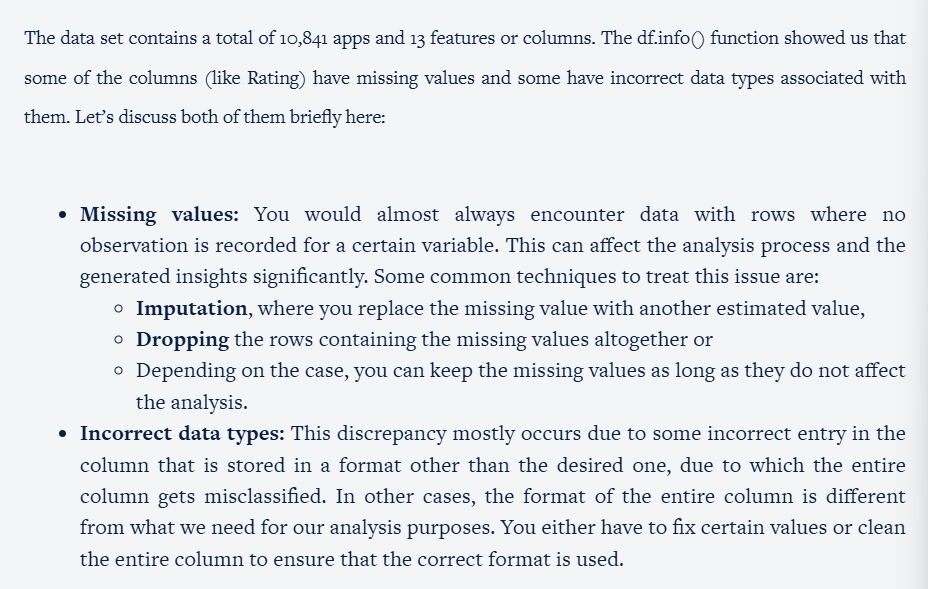

In [ ]:
#Count null values for each column
pldf.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [ ]:
#Handle missing value in the rating column
#rating is the target variable
#We cant do guess works because its important so we should drop the records
pldf=pldf[pldf.Rating.isnull()==False]

In [ ]:
pldf.shape

(9367, 13)

In [ ]:
pldf.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,1
Genres,0


In [ ]:
#Total 8 null values left

In [ ]:
#Lets check the null value in the android version column
pldf[pldf["Android Ver"].isnull()==True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
pldf.loc[10472,:]

,10472
App,Life Made WI-Fi Touchscreen Photo Frame
Category,1.9
Rating,19.0
Reviews,3.0M
Size,21516.529524
Installs,Free
Type,0
Price,Everyone
Content Rating,NaN
Genres,"February 11, 2018"


In [ ]:
#Drop the last record because the column values are swapped it would be easier to delete the row

pldf = pldf.drop(10472)


In [ ]:
#lets check its get deleted or not
pldf.shape
#its deleted because the no of rows earlier where 9367


(9366, 13)

In [ ]:
#For the other two rows where the android version is null we can impute mostly occuring values or mode to solve this problem as its also a categorical value.
#First lets find the most occuring value
pldf["Android Ver"].value_counts()

,count
Android Ver,
4.1 and up,2059
Varies with device,1319
4.0.3 and up,1240
4.0 and up,1131
4.4 and up,875
2.3 and up,582
5.0 and up,535
4.2 and up,338
2.3.3 and up,240


In [ ]:
 #find the null value in the "Android ver" column fill it with this value
pldf["Android Ver"]=pldf["Android Ver"].fillna("4.1 and up")

In [ ]:
pldf.isnull().sum()#lets check

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [ ]:
pldf

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
#lets do same with current version column there are 4 missing value left inside it
pldf[pldf["Current Ver"].isnull()==True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [ ]:
#lets find out the mostly occuring value i.e mode as it is a categorical datatype
pldf["Current Ver"].mode()

,Current Ver
0,Varies with device


In [ ]:
#impute it inplace of the missing values in the same column
pldf["Current Ver"]=pldf["Current Ver"].fillna(pldf["Current Ver"].mode()[0])

In [ ]:
pldf.loc[15,:]#its got imputed successfully

,15
App,Learn To Draw Kawaii Characters
Category,ART_AND_DESIGN
Rating,3.2
Reviews,55
Size,2700.0
Installs,"5,000+"
Type,Free
Price,0
Content Rating,Everyone
Genres,Art & Design


In [ ]:
#Now our data frame is free of missing values/NaN

In [ ]:
#Question
#What is the average price for all the apps that have the Android version as ‘4.1 and up’?
#Answer later

In [ ]:
#Now we need to check the column wise where the dataset is numeric then make it either integer or float datatype

In [ ]:
pldf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
pldf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.3+ MB


In [ ]:
#price column has strings values in it where as we need int or float type column
#lets check what kind of values there in the column and their counts
pldf["Price"].value_counts()

,count
Price,
0,8719
$2.99,114
$0.99,107
$4.99,70
$1.99,59
...,...
$2.95,1
$2.90,1
$1.97,1


In [ ]:
#As majority have 0 dollar price and the string itself has a special character "$" used in the starting of price we need to remove it"
print(type(pldf.loc[2,"Price"]))#lets check the type of the data inside the column
#As we know its string lets start removing the "$" value
pldf["Price"]=pldf["Price"].apply(lambda x:float(x[1:]) if x!="0" else x)
#lets check the changes
pldf["Price"].value_counts()
pldf["Price"]=pldf["Price"].astype(int)
print(type(pldf.loc[2,"Price"]))

<class 'str'>
<class 'numpy.int64'>


In [ ]:
#let’s inspect the Reviews column and make the necessary changes to it.

In [ ]:
pldf["Reviews"].value_counts()

,count
Reviews,
2,83
3,78
5,74
4,74
1,67
...,...
9894,1
316378,1
8484,1


In [ ]:
#lets check the datatype of the value present in the column
print(type(pldf.loc[3,"Reviews"]))#as the type is str we need to convert it to integer type
pldf["Reviews"]=pldf["Reviews"].astype("int")
print(type(pldf.loc[3,"Reviews"]))#its changes now

<class 'str'>
<class 'numpy.int64'>


In [ ]:
pldf["Reviews"].describe()

,Reviews
count,9.366000e+03
mean,5.140498e+05
std,3.144042e+06
min,1.000000e+00
25%,1.862500e+02
50%,5.930500e+03
75%,8.153275e+04
max,7.815831e+07


In [ ]:
#lets solve the installs column now
pldf["Installs"].value_counts()

,count
Installs,
"1,000,000+",1577
"10,000,000+",1252
"100,000+",1150
"10,000+",1010
"5,000,000+",752
"1,000+",713
"500,000+",538
"50,000+",467
"5,000+",432


In [ ]:
#lets chek the datatype of the values
print(type(pldf.loc[3,"Installs"]))#its str
#issue here is this figures include commas and "+" symbol in the string which you wanna convert to int type
pldf["Installs"]=pldf["Installs"].apply(lambda x:int(x.replace(",","").replace("+","")))
#now lets check if the plus and commas in the value are gone or not
#lets check the datatype is converted to int or not
print(pldf[["Installs"]].value_counts())
print(type(pldf.loc[3,"Installs"]))#type is int

<class 'str'>
Installs  
1000000       1577
10000000      1252
100000        1150
10000         1010
5000000        752
1000           713
500000         538
50000          467
5000           432
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: count, dtype: int64
<class 'numpy.int64'>


In [ ]:
#Question:After removing the additional symbols in the Installs column, calculate the approximate number of installs at the 50th percentile.
print(np.percentile(pldf["Installs"],50))#Ans:500000.0

500000.0


# Sanity Checks


Once you have completed the basic data cleansing and data handling tasks, the next step is to ensure that the data available to us ‘makes sense’. What this means is that the data needs to be factually correct apart from being of the correct data type.

For example, on a test where you can score between 0 and 100, a student cannot score 110 marks. If such discrepancies occur in a data set, you need to take care of them accordingly. So, in order to quickly check whether the data in the columns is rational and makes sense, you need to perform the so-called sanity checks

In [ ]:
#avg rating can be 1 to 5 lets check
pldf["Rating"].describe()

,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [ ]:
pldf[pldf["Reviews"]>pldf["Installs"]].shape#There are 7 rows which have these kind of value

(7, 13)

In [ ]:
#another condition which we can check rreviews>Installs
#lets check if there are these type of rows
pldf[pldf["Reviews"]>pldf["Installs"]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [ ]:
#Drop these records becuse its not factually right
pldf=pldf[pldf["Reviews"]<pldf["Installs"]]

In [ ]:
#now lets check if same cases exist
pldf[pldf["Reviews"]>pldf["Installs"]].shape#O ROWLS LIKE THAT LEFT IT WORKED

(0, 13)

In [ ]:
#Another condition is free apps cannot have price other than 0
pldf[(pldf["Type"]=="Free")&(pldf["Price"]>0)].shape

#No such records here

(0, 13)

In [ ]:
'''
three essential sanity checks were performed on the data:

Rating is between 1 and 5 for all the apps.
Number of reviews is less than or equal to the number of installs.
Free apps should not have a price greater than 0.

'''

'\nthree essential sanity checks were performed on the data:\n\nRating is between 1 and 5 for all the apps.\nNumber of reviews is less than or equal to the number of installs.\nFree apps should not have a price greater than 0.\n\n'

## Outliers Analysis With Box Plots


It is time to finally turn our attention to identifying and removing extreme values or outliers from the data set. These values can tilt our analysis and often provide us with a biased perspective of the data available. This is where you will start using visualisation to achieve your tasks, and the visualisation best suited for this is the box plot.

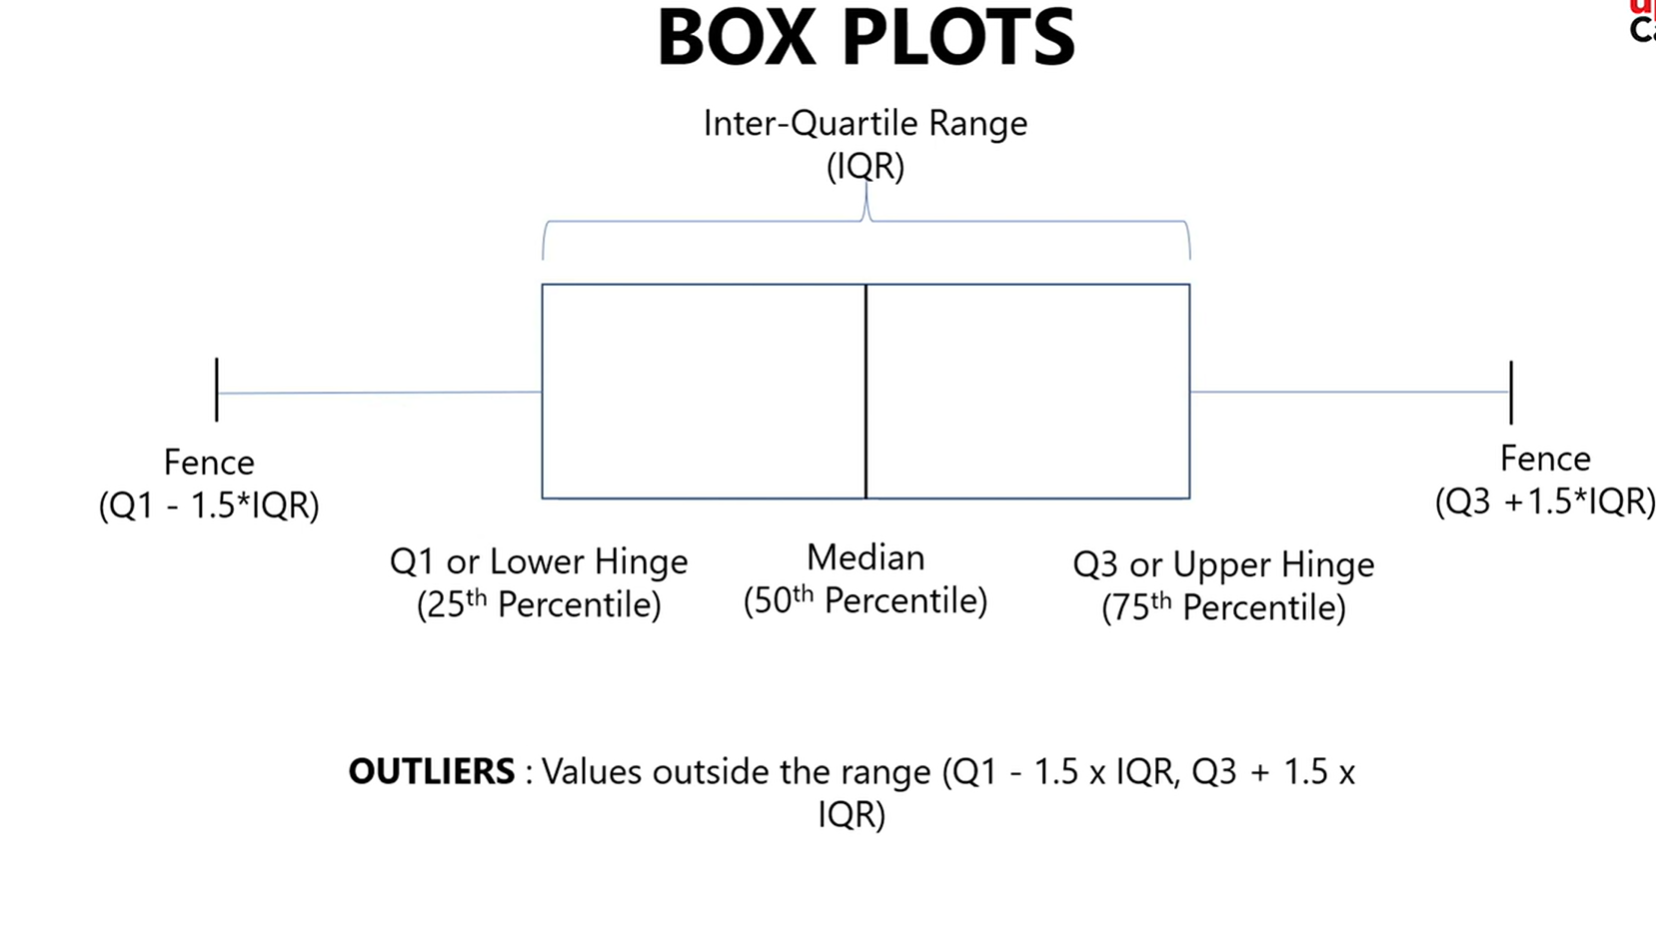

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# %matplotlib inline tells Jupyter to display plots directly
# inside the notebook, rather than in a separate window
%matplotlib inline

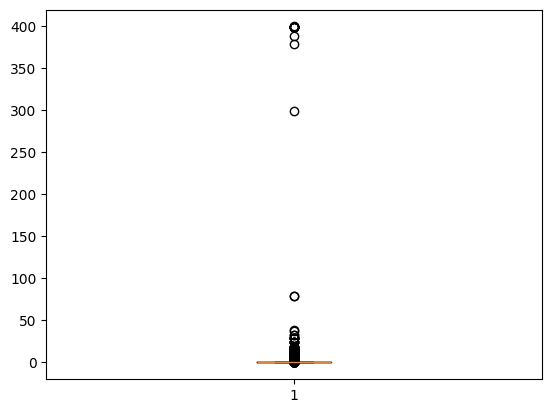

In [ ]:
plt.boxplot(pldf["Price"])
plt.show()

In [ ]:
#Lets check out the highr extreme values prices above 300 dollars
pldf[pldf["Price"]>300]#This looks suspicious not worthy of the records we should have in the data set

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399,Everyone,Finance,"May 1, 2017",3.4,4.4 and up
5362,I Am Rich Pro,FAMILY,4.4,201,2700.0,5000,Paid,399,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up


In [ ]:
# Note on the difference between these two statements:

# 1. This line overwrites the 'Price' column with boolean values:
#    It replaces numeric prices with True/False depending on the condition.
#    This means the original price data is lost!
#pldf["Price"] = pldf["Price"] < 200

#I did a mistake here in the above line code so avoid it

# 2. This line filters the DataFrame rows to keep only those where Price < 200:
#    The original 'Price' column remains unchanged and numeric.
pldf = pldf[pldf["Price"] < 200]

# Summary:
# - Use statement 1 only if you want to convert 'Price' column to booleans.
# - Use statement 2 if you want to keep numeric prices but filter rows.
# - To keep both numeric prices and a boolean flag, create a new column:
#   pldf["Price_under_200"] = pldf["Price"] < 200


In [ ]:
pldf

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
pldf["Price"].describe()

,Price
count,9342.000000
mean,0.274031
std,2.046470
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,79.000000


<Axes: >

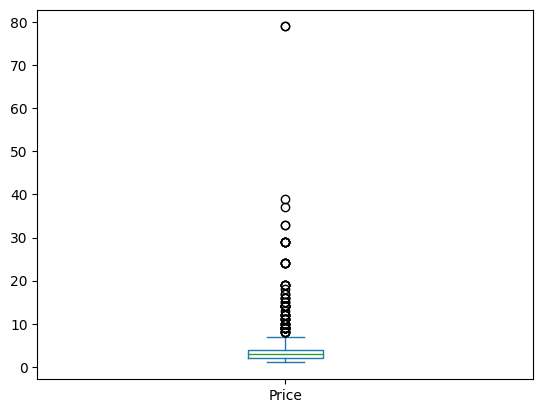

In [ ]:
pldf[pldf["Price"]>0].Price.plot.box()

In [ ]:
#Lets remove the suspicious outliers record above 30 dollars
pldf[pldf["Price"]>30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000,Paid,37,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [ ]:
pldf=pldf[pldf["Price"]<=30]

In [ ]:
pldf.shape

(9336, 13)

# Histograms

In [ ]:
#here is another way in which you can gauge the spread of quantitative value: histograms.

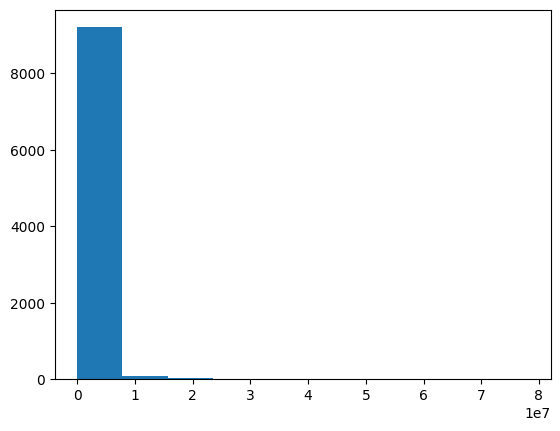

In [ ]:
#Lets check how the reviews are distributed wrt apps
plt.hist(pldf["Reviews"])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7c8939b4d070>,
 'caps': [<matplotlib.lines.Line2D at 0x7c8938dc23f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c8939b4c080>],
 'medians': [<matplotlib.lines.Line2D at 0x7c8938dc01d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c8938dc14f0>],
 'means': []}

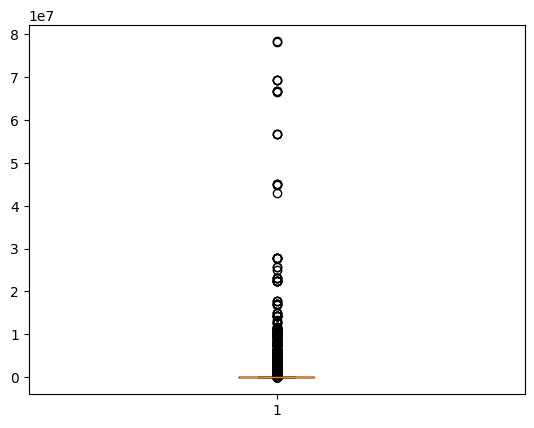

In [ ]:
plt.boxplot(pldf.Reviews)

In [ ]:
#lETS CHECK THE APPS WHERE WE HAVE 10 MILLION REVIEWS
pldf[pldf["Reviews"]>=1000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,21516.529524,100000000,Free,0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,21516.529524,1000000000,Free,0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730,21516.529524,10000000,Free,0,Everyone,Business,"August 3, 2018",Varies with device,Varies with device
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000.000000,100000000,Free,0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
201,Facebook Pages Manager,BUSINESS,4.0,1279184,21516.529524,50000000,Free,0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.000000,10000000,Free,0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up
10200,Facebook Pages Manager,BUSINESS,4.0,1279800,21516.529524,50000000,Free,0,Everyone,Business,"August 6, 2018",Varies with device,Varies with device
10327,Garena Free Fire,GAME,4.5,5534114,53000.000000,100000000,Free,0,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up
10636,FRONTLINE COMMANDO,GAME,4.4,1351833,12000.000000,10000000,Free,0,Teen,Action,"October 28, 2013",3.0.3,2.1 and up


In [ ]:
#These are popular apps and doesnt need our boost in visibility we need new apps which need boost visibility promotion
#check shape before dropping
pldf.shape
#lets drop these records
pldf=pldf[pldf["Reviews"]<=1000000]
#after dropping the shape is
pldf.shape

(8632, 13)

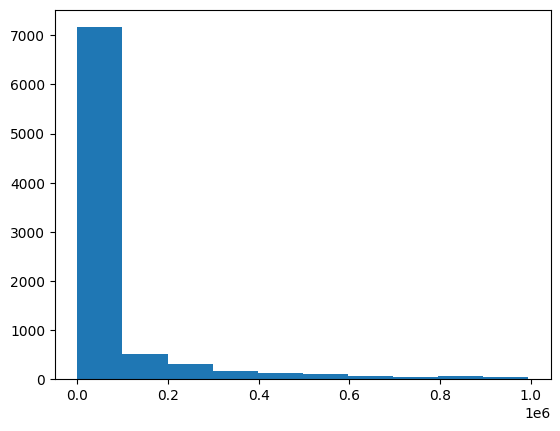

In [ ]:
#Lets check how the reviews are distributed wrt apps
plt.hist(pldf["Reviews"])
plt.show()

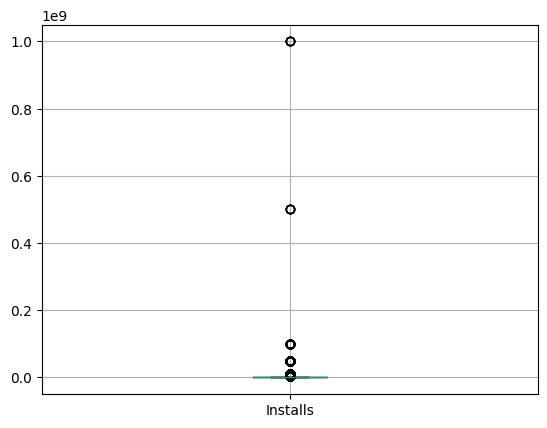

In [ ]:
#Question to answer
#Calculate the IQR of the Installs column.
pldf.boxplot(column="Installs")
plt.show()

In [ ]:
pldf["Installs"].describe()

,Installs
count,8.632000e+03
mean,4.289530e+06
std,2.864975e+07
min,5.000000e+00
25%,1.000000e+04
50%,1.000000e+05
75%,1.000000e+06
max,1.000000e+09


In [ ]:
x=np.percentile(pldf["Installs"],25)
y=np.percentile(pldf["Installs"],75)
iqr=x-y
print(iqr)#Answer

-990000.0


In [ ]:
'''You had to solve this using either a boxplot or the describe() method. The code would be as follows:

inp1.Installs.describe()
Then, you would have calculated the IQR by subtracting the 25th percentile value from the 75th percentile, which lead you to the right answer.'''

'You had to solve this using either a boxplot or the describe() method. The code would be as follows:\n\ninp1.Installs.describe()\nThen, you would have calculated the IQR by subtracting the 25th percentile value from the 75th percentile, which lead you to the right answer.'

In [ ]:
#Question
#Analysing the Installs Column
#Remove all the apps that have the number of installs greater than 100 million. After that, evaluate the shape of the data and choose the correct option.
pldf[pldf["Installs"]>100000000]
pldf=pldf[pldf["Installs"]<=100000000]
pldf.shape#Answer

(8622, 13)

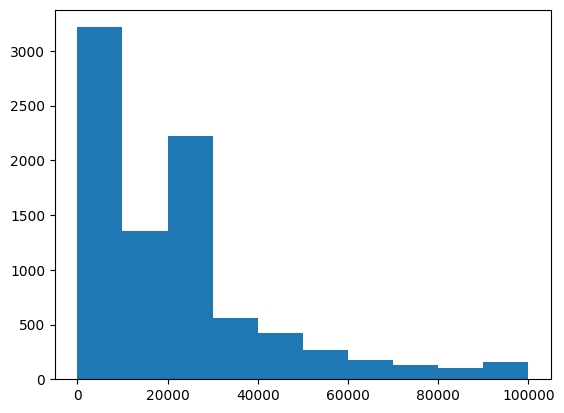

In [ ]:
# Question
#Plot a histogram for the Size column and choose the correct option.
plt.hist(pldf["Size"])
plt.show()

In [ ]:
#Analysing the Size Column
#Analyse the size column using a boxplot and select the approximate median value from the following options.

In [ ]:
pldf["Size"].describe()

,Size
count,8622.000000
mean,21639.272196
std,20668.668924
min,8.500000
25%,6000.000000
50%,18000.000000
75%,26000.000000
max,100000.000000


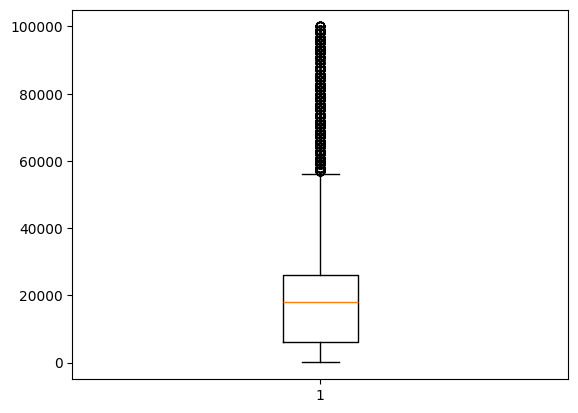

In [ ]:
plt.boxplot(pldf["Size"])
plt.show()

In [ ]:
#Data Analysis using seaborn to answer business questions
import warnings
warnings.filterwarnings("ignore")

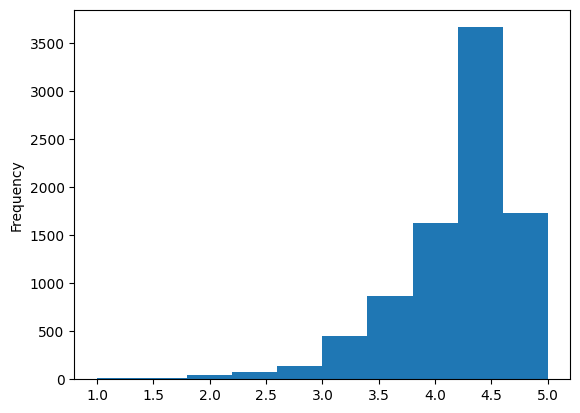

In [ ]:
#distribution of the ratings
#using matplotlib
pldf["Rating"].plot.hist()
plt.show()

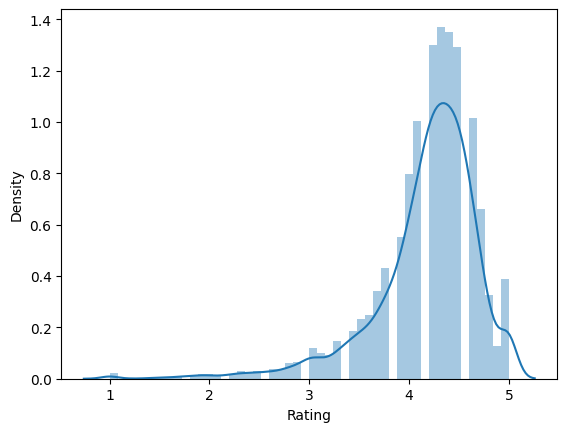

In [ ]:
#using seaborn
import seaborn as sns
sns.distplot(pldf["Rating"])
plt.show()


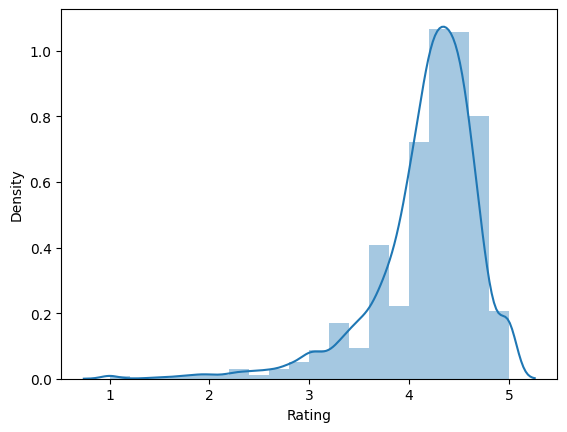

In [ ]:
#Histogram with limited number of bins
sns.distplot(pldf["Rating"],bins=20)
plt.show()

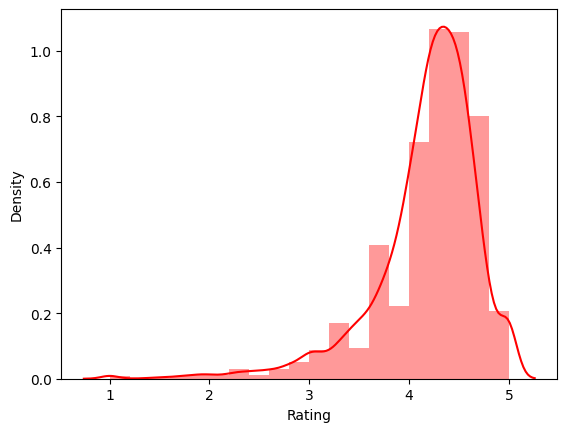

In [ ]:
#Changing the colour of the plot
sns.distplot(pldf["Rating"],bins=20,color="r")
plt.show()

In [ ]:
#One of the major advantages of adopting Seaborn, as previously mentioned, is that you may keep its aesthetic qualities while simultaneously using Matplotlib to perform extra customisations.

In [ ]:
#Use different style and themes


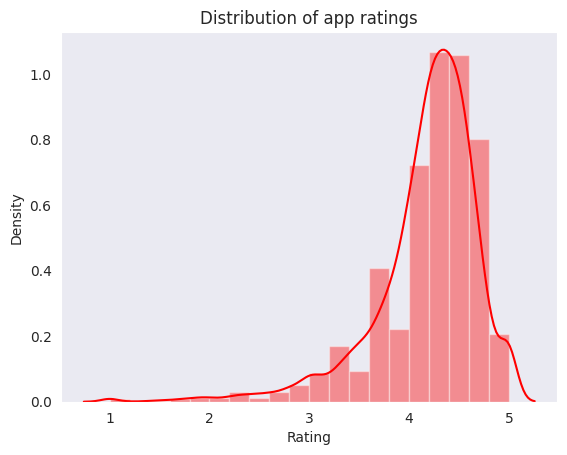

In [ ]:
sns.set_style("dark")
sns.distplot(pldf["Rating"],bins=20,color="r")
plt.title("Distribution of app ratings",fontsize=12)
plt.show()

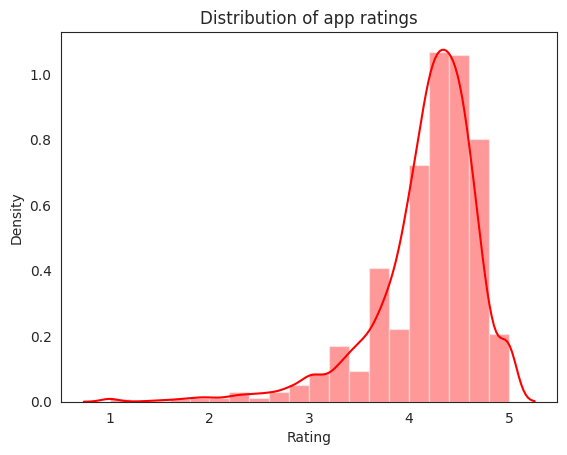

In [ ]:
sns.set_style("white")
sns.distplot(pldf["Rating"],bins=20,color="r")
plt.title("Distribution of app ratings",fontsize=12)
plt.show()

In [ ]:
#Matplotlib themes and styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [ ]:
plt.style.use("dark_background")

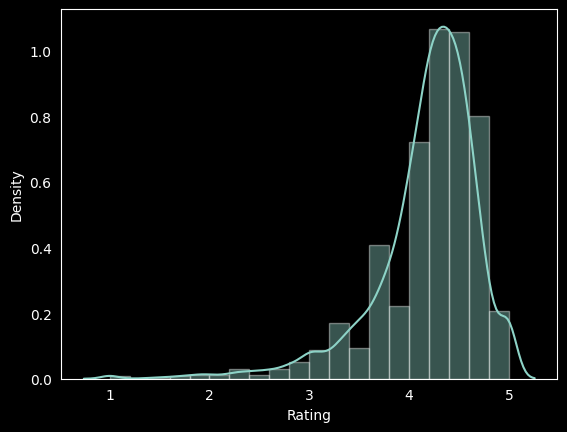

In [ ]:
sns.distplot(pldf["Rating"],bins=20)
plt.show()

In [ ]:
plt.style.use("ggplot")

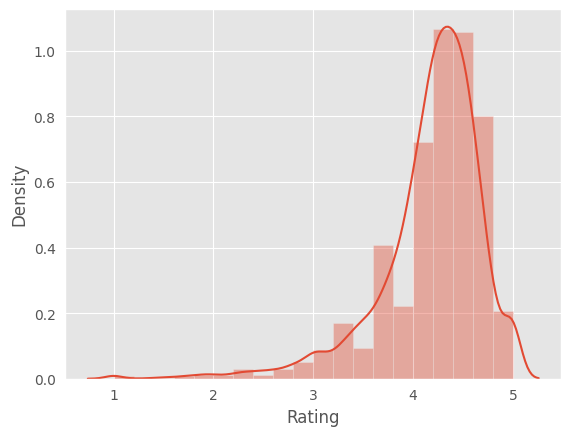

In [ ]:
sns.distplot(pldf["Rating"],bins=20)
plt.show()

In [ ]:
'''
plt.style.use("default")
%matplotlib inline'''
#Reset the theme and colurs that were changed

'\nplt.style.use("default")\n%matplotlib inline'

# Pie Chart and Bar Chart

In [ ]:
pldf["Content Rating"].value_counts()

,count
Content Rating,
Everyone,6936
Teen,928
Mature 17+,417
Everyone 10+,337
Adults only 18+,3
Unrated,1


In [ ]:
pldf[pldf["Content Rating"].isin(["Adults only 18+","Unrated"])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
298,Manga Master - Best manga & comic reader,COMICS,4.6,24005,4900.000000,500000,Free,0,Adults only 18+,Comics,"July 4, 2018",1.1.7.0,4.1 and up
3043,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,41000.000000,1000000,Free,0,Adults only 18+,Sports,"July 24, 2018",3.21.324,4.4 and up
6424,Manga Books,COMICS,3.8,7326,21516.529524,500000,Free,0,Adults only 18+,Comics,"August 3, 2018",Varies with device,Varies with device
8266,DC Universe Online Map,TOOLS,4.1,1186,6400.000000,50000,Free,0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


In [ ]:
#Dropping records for adault only 19+and unrated
#before dropping shape
print(pldf.shape)
pldf=pldf[~pldf["Content Rating"].isin(["Adults only 18+","Unrated"])]
#after dropping the shape
print(pldf.shape)

(8622, 13)
(8618, 13)


In [ ]:
pldf.reset_index(inplace=True,drop=True)

In [ ]:
pldf["Content Rating"].value_counts()

,count
Content Rating,
Everyone,6936
Teen,928
Mature 17+,417
Everyone 10+,337


In [ ]:
plt.style.use("default")
%matplotlib inline

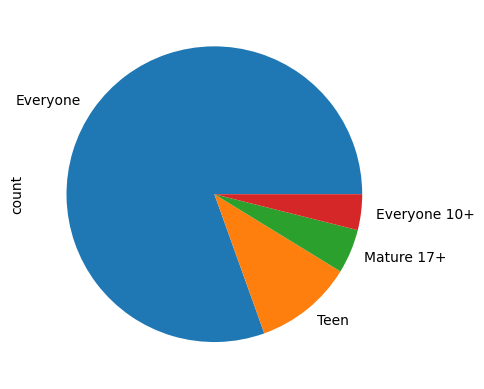

In [ ]:
#lets plot a pie chart
pldf["Content Rating"].value_counts().plot.pie()
plt.show()

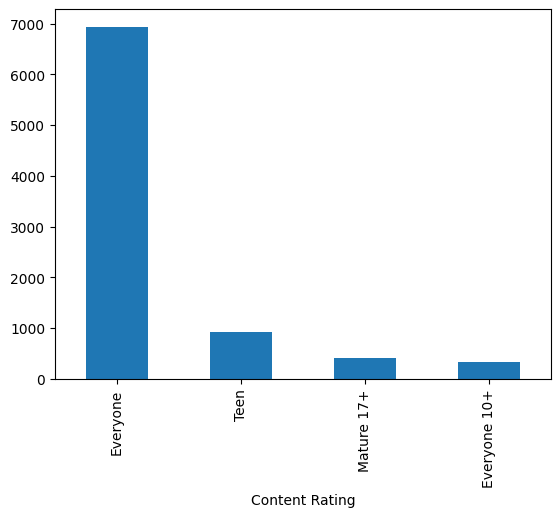

In [ ]:
#lets plot a bar chart
pldf["Content Rating"].value_counts().plot.bar()
plt.show()

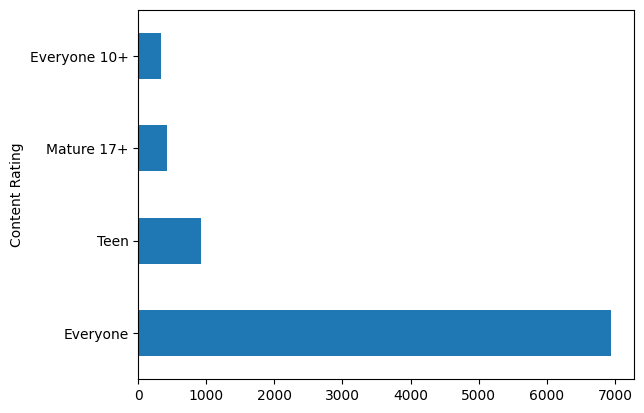

In [ ]:
#lets plot a horizontal bar chart
pldf["Content Rating"].value_counts().plot.barh()
plt.show()

In [ ]:
pldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8618 non-null   object 
 1   Category        8618 non-null   object 
 2   Rating          8618 non-null   float64
 3   Reviews         8618 non-null   int64  
 4   Size            8618 non-null   float64
 5   Installs        8618 non-null   int64  
 6   Type            8618 non-null   object 
 7   Price           8618 non-null   int64  
 8   Content Rating  8618 non-null   object 
 9   Genres          8618 non-null   object 
 10  Last Updated    8618 non-null   object 
 11  Current Ver     8618 non-null   object 
 12  Android Ver     8618 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 875.4+ KB


Scatterplot (Matplotlib)


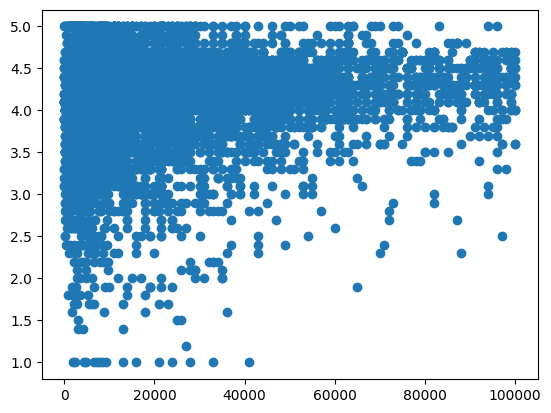

Scatterplot (Seaborn)


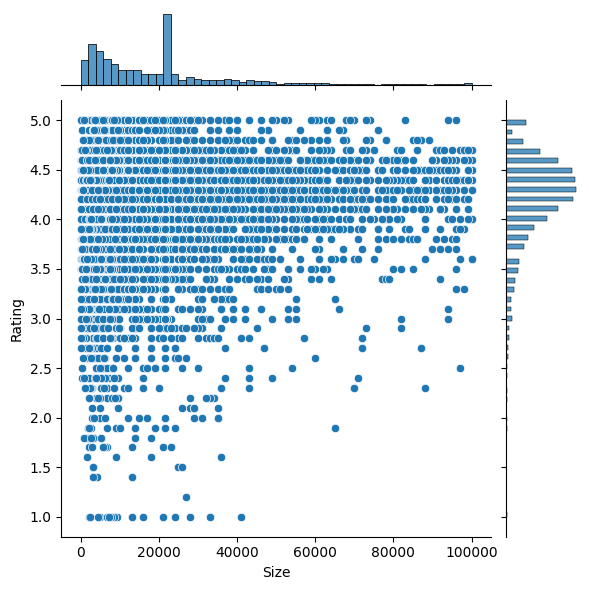

In [ ]:
#When we have 2 numerical field then of we need to check relation ship between them then we use scatterplot
'''Scatter plot-size vs Rating'''
#using matplotlib
print("Scatterplot (Matplotlib)")
plt.scatter(pldf["Size"],pldf["Rating"])
plt.show()

#Using seaborn
print("Scatterplot (Seaborn)")
sns.jointplot(x=pldf["Size"], y=pldf["Rating"])
plt.show()


# Regplots


 When you were introduced to the seaborn library, it was mentioned that seaborn provides automatic estimation and plotting for regression setups for different kinds of variables. So, here you will briefly take a look at regplots and give an intuitive understanding of what insights they provide us with in terms of the concepts you learnt in the scatterplot segment. Here, you will look at the relationship between Rating and Price.

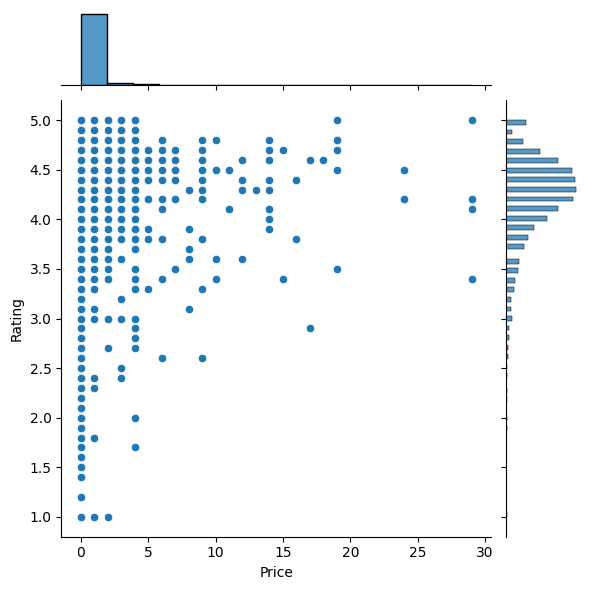

In [ ]:
#Does price also has influence on rating lets check
sns.jointplot(x=pldf["Price"],y=pldf["Rating"])
plt.show()

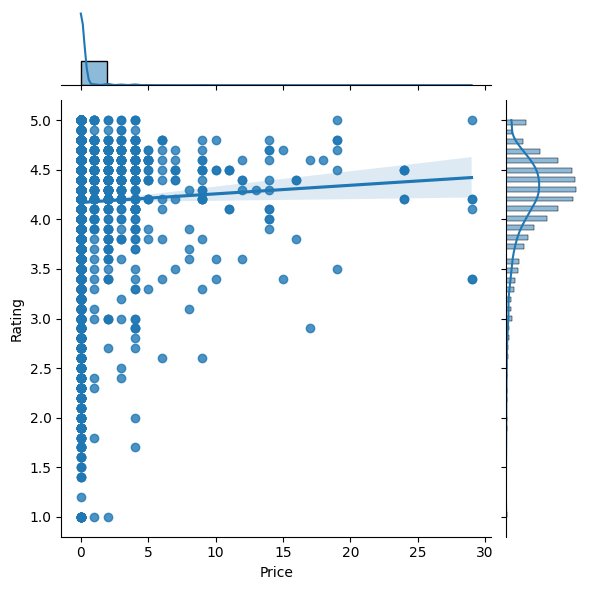

In [ ]:
#lets do a regression analysis
sns.jointplot(x=pldf["Price"],y=pldf["Rating"],kind="reg")
plt.show()

In [ ]:
#Things needed to learn in the above plot is that
#1.its easy to get a regression plot in seaborn
#2.it shows a positive slope

#Pair Plots
 In case there are 4–5 numeric variables that you want to analyse, making a jointplot for every 2 numeric variables is a bit tedious. To overcome this limitation, let’s learn another functionality: the pair plots or pairplots (used interchangeably throughout).

In [ ]:
#lets plot all the numeric columns together
pldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8618 non-null   object 
 1   Category        8618 non-null   object 
 2   Rating          8618 non-null   float64
 3   Reviews         8618 non-null   int64  
 4   Size            8618 non-null   float64
 5   Installs        8618 non-null   int64  
 6   Type            8618 non-null   object 
 7   Price           8618 non-null   int64  
 8   Content Rating  8618 non-null   object 
 9   Genres          8618 non-null   object 
 10  Last Updated    8618 non-null   object 
 11  Current Ver     8618 non-null   object 
 12  Android Ver     8618 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 875.4+ KB


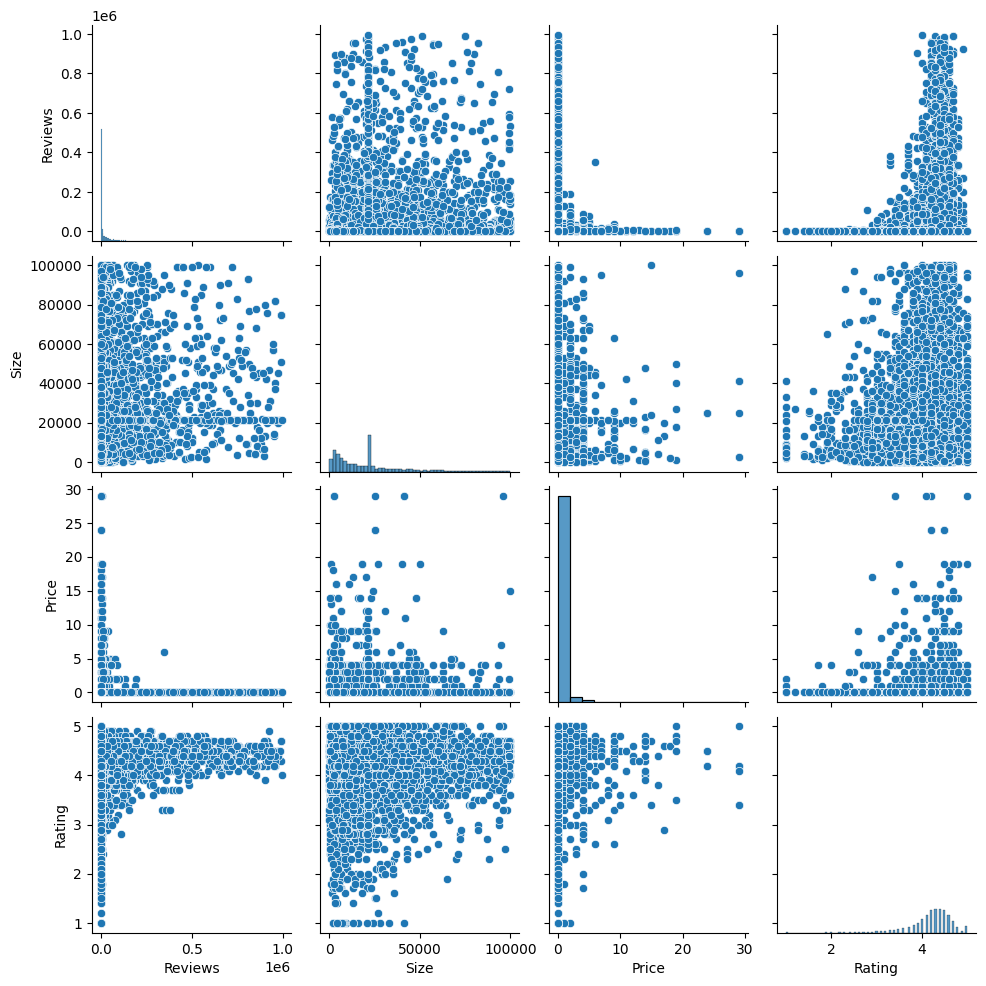

In [ ]:
sns.pairplot(pldf[["Reviews","Size","Price","Rating"]])
plt.show()

As you can see, the pair plot creates a scatter-plot for every two numeric variables, whereas in the case of the diagonal ones where the same variable is being considered twice, a histogram is shown.



Here, you can make certain inferences in conjunction with the ones made in earlier segments, like how reviews and price have an inverse relationship, as the L-shaped scatterplot represents. Now, compared to the previous jointplot, you observe that the statistical information is a bit less (no Pearson coefficient to explain the correlation between the two variables), but having a bird’s eye view of all the numeric variables at once has its own advantages.

# Application in Machine Learning
In linear regression, you have a lot of predictor variables to choose from to build the initial model, where pairplots simplify the process and identify the best variables. Suppose you want to forecast how three separate things will affect your company’s profitability. To decide, make a pair plot with profits and the three different factors as the variables. Here are the profit scatterplots vs the three variables you got from the pair plot.

Given how linearly distributed the points are and how randomly distributed the other two components are, it is evident that the left-most factor is the most significantly associated with profitability. In a single view, you were able to ascertain the predictor variables of our linear regression model.


# Additional Notes:
**You might be wondering what all this fuss is about using visualisation to find the correlation between multiple variables. As it turns out, finding correlated variables is an important task throughout the entire machine learning paradigm. The correlation metric has far-reaching implications in building or not building certain ML models, and many model evaluation and optimisation procedures are utilised often to check if the number of correlated variables is kept within an acceptable range or not**

# Revisiting Bar Graphs and Box Plots
will learn about some additional customisations that Seaborn provides, along with certain use cases where those functionalities come in handy


<Axes: xlabel='Content Rating'>

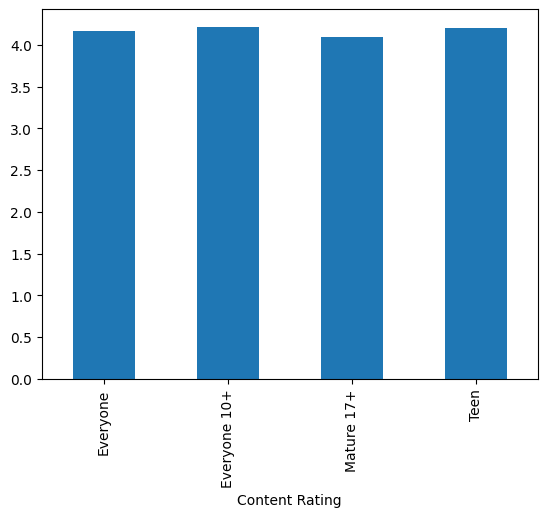

In [ ]:
#Content rating vs rating
pldf.groupby(["Content Rating"])["Rating"].mean().plot.bar()

<Axes: xlabel='Content Rating'>

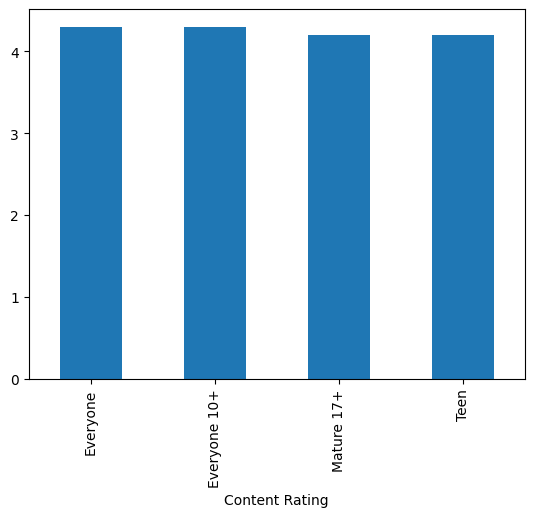

In [ ]:
pldf.groupby(["Content Rating"])["Rating"].median().plot.bar()

In [ ]:
#Since taking just the average did not give us any insight, we decided to use the median metric. Here,
#you observed that the median value also did not prove to be a good differentiator for the categories being analysed.

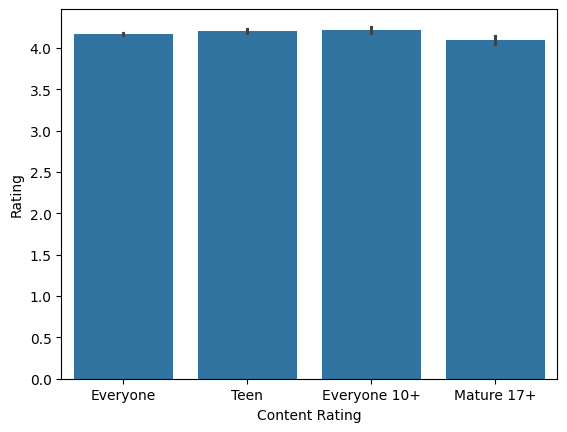

In [ ]:
sns.barplot(data=pldf,x="Content Rating",y="Rating")
plt.show()#the difference between above graph and this one is it automatically and bydefault take the avg of the contenet rating value

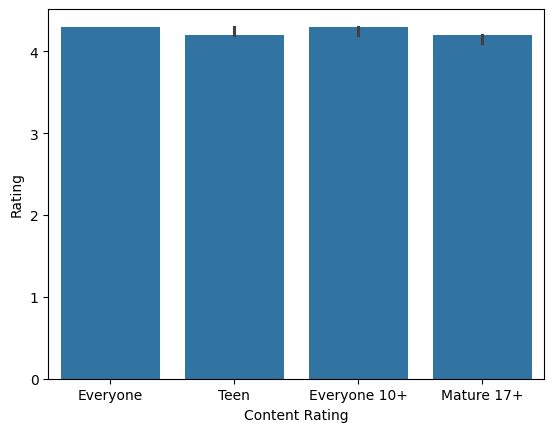

In [ ]:
sns.barplot(data=pldf,x="Content Rating",y="Rating",estimator=np.median)
plt.show()#we can change the estimator to mean

In [ ]:
'''
Now, this is where you utilised Seaborn’s estimator function to create bar graphs for different metrics (other than the median and mean), as you did earlier.
In this case, you used the value at the 5th percentile to compare the categories and utilised the following estimator function for it.


'''

'\nNow, this is where you utilised Seaborn’s estimator function to create bar graphs for different metrics (other than the median and mean), as you did earlier.\nIn this case, you used the value at the 5th percentile to compare the categories and utilised the following estimator function for it.\n\n\n'

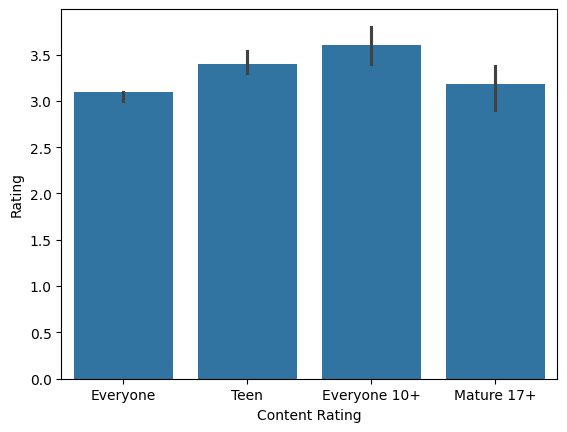

In [ ]:
sns.barplot(data=pldf,x="Content Rating",y="Rating",estimator=lambda x:np.quantile(x,0.05))
plt.show()#lets change the estimator to check the lower end vlues at less percentile

In [ ]:
'''
Here, you can see some clear differences popping up:
‘Everyone 10+’ has the highest rating at the 5th percentile (3.5), followed by ‘Teen’ (around 3.3) and then ‘Everyone’ and ‘Mature 17+’ (around 3).
'''

'\nHere, you can see some clear differences popping up:\n‘Everyone 10+’ has the highest rating at the 5th percentile (3.5), followed by ‘Teen’ (around 3.3) and then ‘Everyone’ and ‘Mature 17+’ (around 3).\n'

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Reset matplotlib to its default rcParams
mpl.rcParams.update(mpl.rcParamsDefault)

# Reset seaborn (removes seaborn styling/palettes)
sns.reset_defaults()

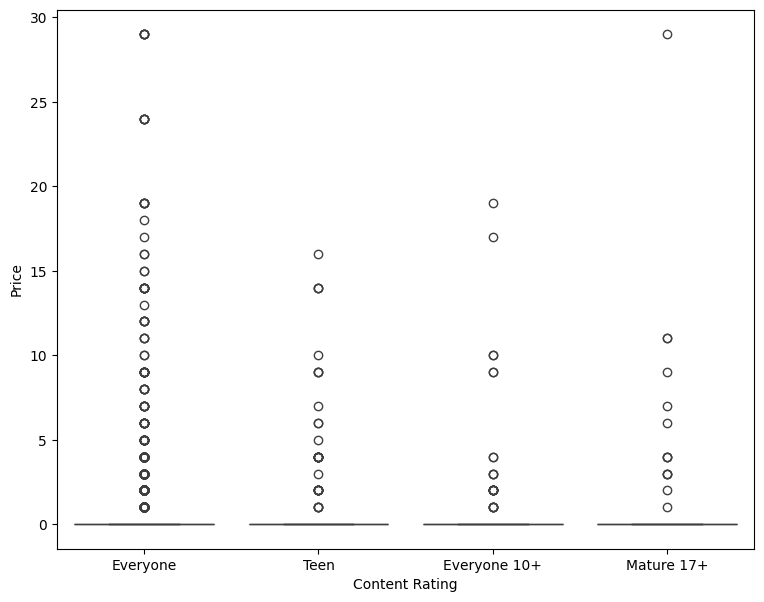

In [ ]:
#lets make a box plot for each category
plt.figure(figsize=[9,7])
sns.boxplot(x=pldf["Content Rating"],y=pldf["Price"])
plt.show()

Here, you get a bird’s eye view of the spread of ratings for the different categories: median, 75th percentile, fences, etc. The immediate insights that you obtained from the above view are that:

The ‘Everyone’ category has the highest number of ratings in the lower percentiles as compared to the other categories.
The median values are all comparable, which was discovered in the previous views as well.
 The upper fences for all the categories are capped at 5.0, but there are some observable differences in the lower fences.

In [ ]:
#Rating vs size vs Content Rating
#we are going to create the numerical value column size to categorical bins 5 bins
#LETS CREATE ANOTHER COPYOF PLDF DATAFRAME FOR THIS QCUT IMPLEMENTATION
pldf2 = pldf.copy()
pldf2["Size Bucket"]=pd.qcut(pldf["Size"],[0,0.2,0.4,0.6,0.8,1],["VL","L","M","H","VH"])

In [ ]:
pldf2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size Bucket
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,H
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VL


In [ ]:
pt = pd.pivot_table(
    pldf2,
    index="Content Rating",
    columns="Size Bucket",
    values="Rating",
    aggfunc="mean"      # or "count", "sum", "min", "max"
)
print(pt)
'''
That code creates a summary table (a pivot table) that tells you the average Rating for each combination of:

Row group: Content Rating (Everyone, Teen, etc.)

Column group: Size Bucket (VL, M, H, …)

Value being summarized: Rating

How it’s summarized: mean (average)

So the output pt is a new DataFrame that looks like a grid:

Rows = content rating categories

Columns = size buckets

Each cell = mean rating of apps that fall in that row+column group

Example (imaginary):




'''


Size Bucket           VL         L         M         H        VH
Content Rating                                                  
Everyone        4.116551  4.158405  4.215784  4.170799  4.187302
Everyone 10+    4.189474  4.207407  4.238318  4.193443  4.217073
Mature 17+      3.978947  4.124211  4.021705  4.155172  4.193814
Teen            4.184848  4.233094  4.143310  4.198131  4.246154


'\nThat code creates a summary table (a pivot table) that tells you the average Rating for each combination of:\n\nRow group: Content Rating (Everyone, Teen, etc.)\n\nColumn group: Size Bucket (VL, M, H, …)\n\nValue being summarized: Rating\n\nHow it’s summarized: mean (average)\n\nSo the output pt is a new DataFrame that looks like a grid:\n\nRows = content rating categories\n\nColumns = size buckets\n\nEach cell = mean rating of apps that fall in that row+column group\n\nExample (imaginary):\n\n\n\n\n'

In [ ]:
pt = pd.pivot_table(
    pldf2,
    index="Content Rating",
    columns="Size Bucket",
    values="Rating",
    aggfunc="median"      # or "count", "sum", "min", "max"
)
print(pt)


Size Bucket       VL    L    M    H   VH
Content Rating                          
Everyone        4.20  4.3  4.3  4.3  4.3
Everyone 10+    4.10  4.3  4.3  4.3  4.3
Mature 17+      4.25  4.2  4.1  4.1  4.2
Teen            4.20  4.3  4.2  4.2  4.3


In [ ]:
pt = pd.pivot_table(
    pldf2,
    index="Content Rating",
    columns="Size Bucket",
    values="Rating",
    aggfunc=lambda x:np.quantile(x,0.2)      # or "count", "sum", "min", "max"
)
print(pt)


Size Bucket       VL     L    M    H   VH
Content Rating                           
Everyone        3.80  3.80  4.0  3.8  3.9
Everyone 10+    3.86  3.92  4.1  4.0  4.0
Mature 17+      3.30  3.68  3.7  3.9  4.0
Teen            3.80  3.90  3.9  4.0  4.0


introduced to the concept of binning, where you convert a numeric variable to a categorical variable by bucketing a specific range of values. This is pretty useful during analyses where you can create useful buckets and analyse how some other variable changes across those buckets.



One of the most common examples of binning is in demographic survey data sets (like Census or Market research surveys) that contain the Age column, where people can be categorised as Under 12, 12-17, 18-24, and so on. Despite the actual age of the person being a numeric value, it is much easier to analyse across buckets and gather insights (like asking how many people in the 12-17 age bucket have gone to school, how many of them prefer a particular brand over the other, and so on).

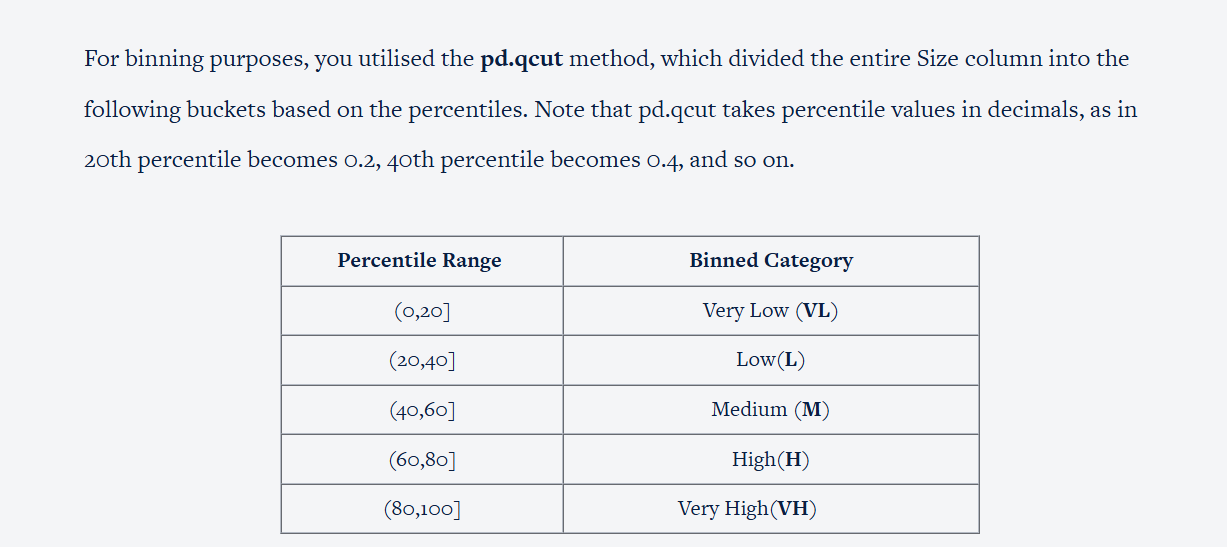

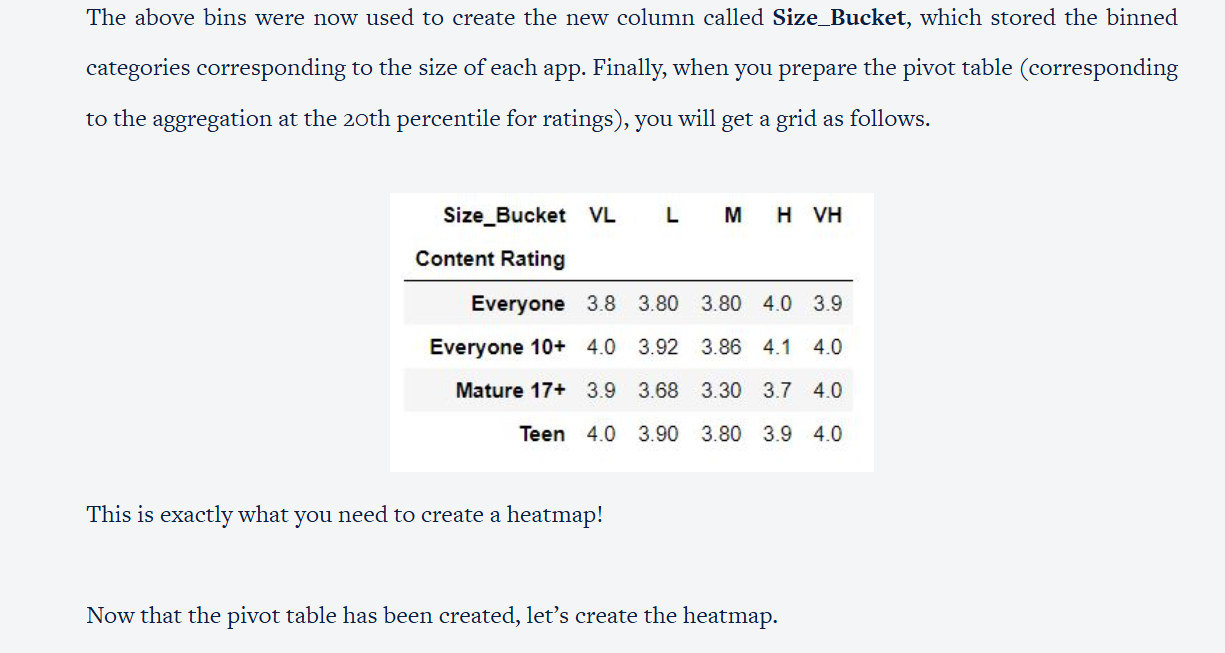

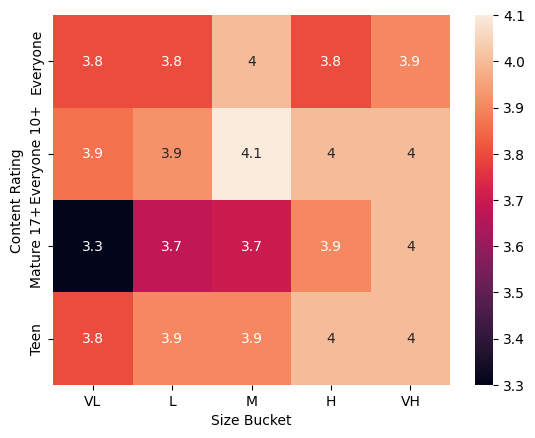

In [ ]:
#Now that the pivot table has been created, let’s create the heatmap.
res= pd.pivot_table(
    pldf2,
    index="Content Rating",
    columns="Size Bucket",
    values="Rating",
    aggfunc=lambda x:np.quantile(x,0.2)      # or "count", "sum", "min", "max"
)
sns.heatmap(res,annot=True)
plt.show()

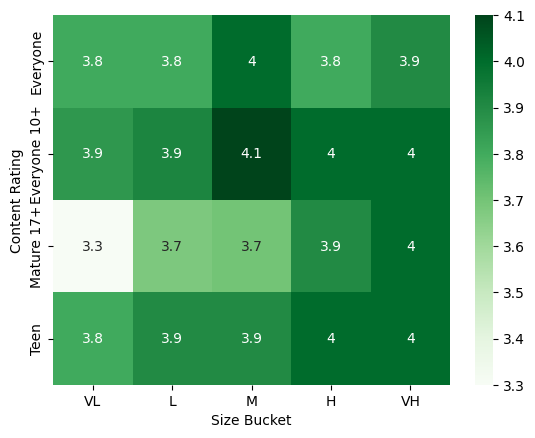

In [ ]:
sns.heatmap(res,cmap="Greens",annot=True)
plt.show()

In [ ]:
'''
Heat maps are predominantly used in machine learning problems to visualise a  correlation matrix, a grid that shows the correlation between any two quantitative variables. As mentioned in the additional notes of previous segments, understanding the correlation between variables is crucial for building and evaluating any ML model.
You will learn more about them in the upcoming modules.'''

'\nHeat maps are predominantly used in machine learning problems to visualise a  correlation matrix, a grid that shows the correlation between any two quantitative variables. As mentioned in the additional notes of previous segments, understanding the correlation between variables is crucial for building and evaluating any ML model.\nYou will learn more about them in the upcoming modules.'

In [ ]:
#What we have done above is mentioed properly under the same
# Heatmap = a colored TABLE (matrix)
# It needs:
#   - Rows = categories
#   - Columns = categories
#   - Each cell = one single number (like mean/quantile)

# In our case:
#   - "Content Rating" is already categorical (Everyone, Teen, etc.) -> good for ROWS
#   - "Size" is numeric & continuous (many unique values) -> NOT good for COLUMNS

# If we directly use "Size" as columns:
#   - we'd get hundreds/thousands of columns (one per unique size)
#   - most cells would be empty
#   - heatmap becomes messy and unreadable

# Step 1 (qcut) solves this:
#   - Converts numeric "Size" into a few categorical groups (bins)
#   - Example bins: VL, L, M, H, VH
#   - Now we have a clean categorical column "Size Bucket" -> good for COLUMNS

# Step 2 (pivot_table) creates the 2D table needed for heatmap:
#   - Rows    = Content Rating
#   - Columns = Size Bucket
#   - Values  = one summary number per cell (mean / 20th percentile / count etc.)

# Then sns.heatmap() colors this 2D table.


## LINE CHART

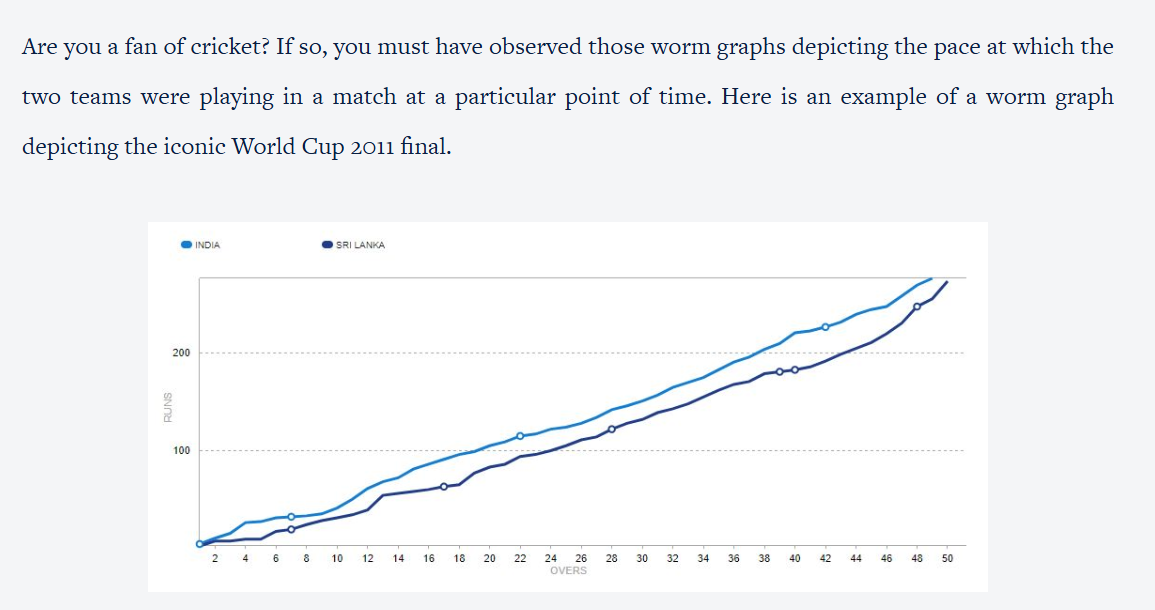

This graph is an example of a line graph (when drawn at such a scale, it resembles a ‘crawling worm’). In the earlier session on matplotlib, you learnt what a line graph is and understood its main uses. Its main feature is that it utilises continuous time-dependent data to accurately depict the trend of a variable. In the next video, let’s see how you can build a line chart for the case study.



In [ ]:
#Note: Earlier, you used the parse_time parameter to index the date-time fields.
#In this demo, you will be using another pd.to_datetime pandas function.
#You are advised to check its documentation before starting this function link:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
pldf.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,int64
Size,float64
Installs,int64
Type,object
Price,int64
Content Rating,object
Genres,object


In [ ]:
pldf["Last Updated"].head()#Lets check the type of data available in the last updated column

,Last Updated
0,"January 7, 2018"
1,"January 15, 2018"
2,"August 1, 2018"
3,"June 8, 2018"
4,"June 20, 2018"


In [ ]:
pd.to_datetime(pldf["Last Updated"]).dt.month
'''
Here’s what happens:

pd.to_datetime(...) converts each text date into a real datetime value.

"January 7, 2018" → a datetime object

.dt.month extracts only the month number from each date:

January → 1

June → 6

August → 8
etc.





'''

,Last Updated
0,1
1,1
2,8
3,6
4,6
...,...
8613,6
8614,7
8615,7
8616,1


In [ ]:
pldf["Updated Month"]=pd.to_datetime(pldf["Last Updated"]).dt.month

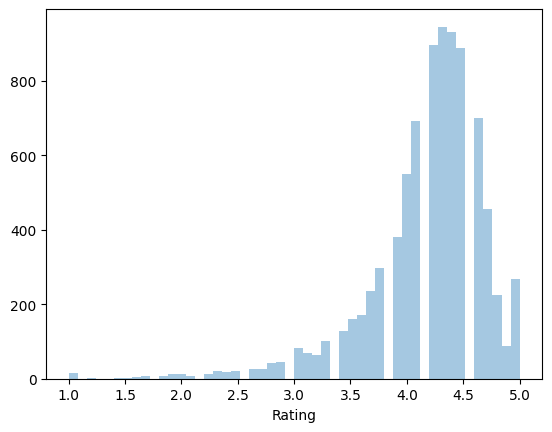

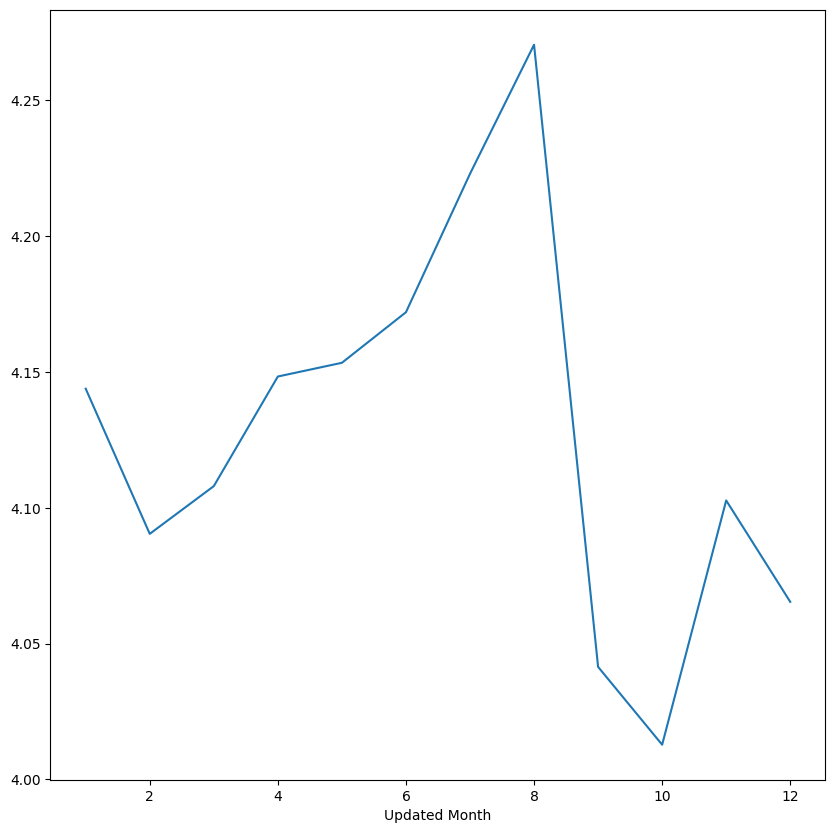

In [ ]:
plt.figure(figsize=(10,10))
pldf.groupby(["Updated Month"])["Rating"].mean().plot()
plt.show()

# What this code does:
# 1) pldf.groupby(["Updated Month"])["Rating"].mean()
#    - Groups the dataset by "Updated Month" (usually values 1 to 12)
#    - For each month, calculates the average (mean) of the "Rating"
#    - Output becomes 12 values: avg rating for Jan, Feb, ..., Dec (if all months exist)

# 2) .plot()
#    - Plots those monthly average ratings as a line chart
#    - X-axis: Updated Month (1=Jan, 2=Feb, ... 12=Dec)
#    - Y-axis: Average Rating

# 3) plt.figure(figsize=(10,10))
#    - Makes the plot figure bigger (10x10) for better visibility

# What answer / insight we get by running it:
# - We learn whether the average rating changes across months
# - Helps identify months with higher/lower average ratings (pattern/spikes/dips)
# - NOTE: This shows association only (not proof that updating in that month causes rating changes)


# Stacked Bar Charts
Earlier, you learnt how to analyse categorical variables using a bar chart. You can also add another categorical variable to the mix and analyse it further with the help of a stacked bar chart. In the following demonstration, you will be creating a stacked bar chart by comparing Installs across the different months and different categories of Content Rating.



In [ ]:
#lets check monthwise which apps are geting what number of total installs by content rating
pd.pivot_table(data=pldf,values="Installs",index="Updated Month",columns="Content Rating",aggfunc=sum)

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Updated Month,,,,
1,925387390,105282000,9701210,44159010
2,545372005,19821000,13021500,39597710
3,695365520,30322510,9111100,79850310
4,973371180,23300000,5259000,161619410
5,1861067800,118173500,50140100,202689600
6,2427170495,317727100,145257200,415716600
7,7771109680,456556000,419491910,1943556800
8,5930943315,215821000,312981700,1257855650
9,260340410,24931100,2201010,22483100


In [ ]:
monthlyivscr=pd.pivot_table(data=pldf,values="Installs",index="Updated Month",columns="Content Rating",aggfunc=sum)

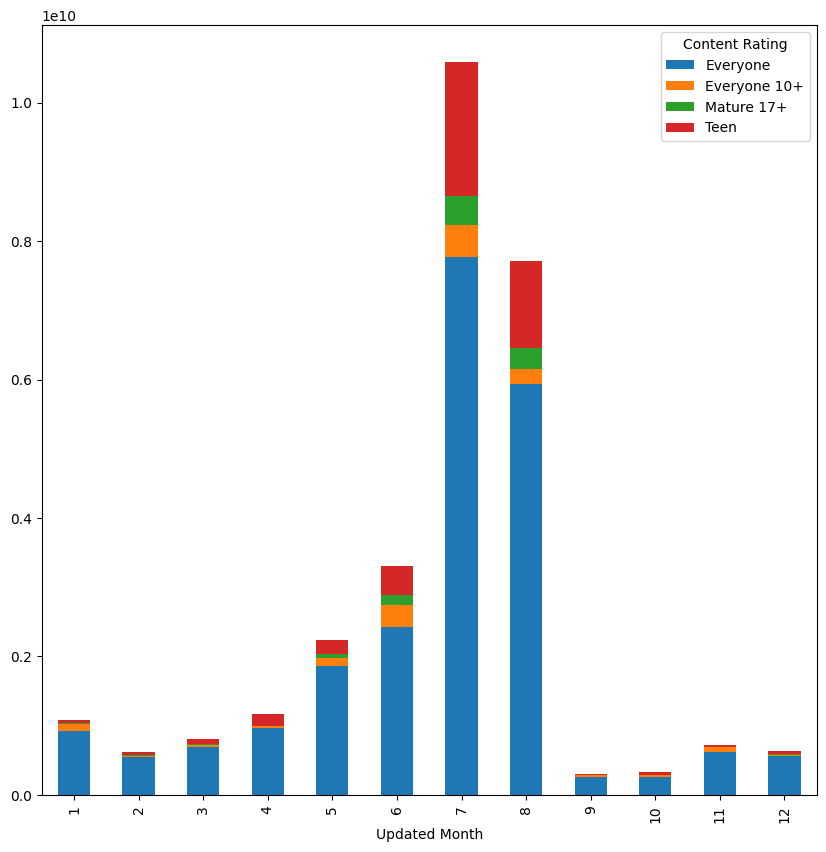

In [ ]:
monthlyivscr.plot(kind="bar",stacked="True",figsize=(10,10))
plt.show()

In [ ]:
#lets get propotions in place of absolutely numbers
monthlyivscr=monthlyivscr[["Everyone","Everyone 10+","Mature 17+","Teen"]].apply(lambda x:x/x.sum(),axis=1)

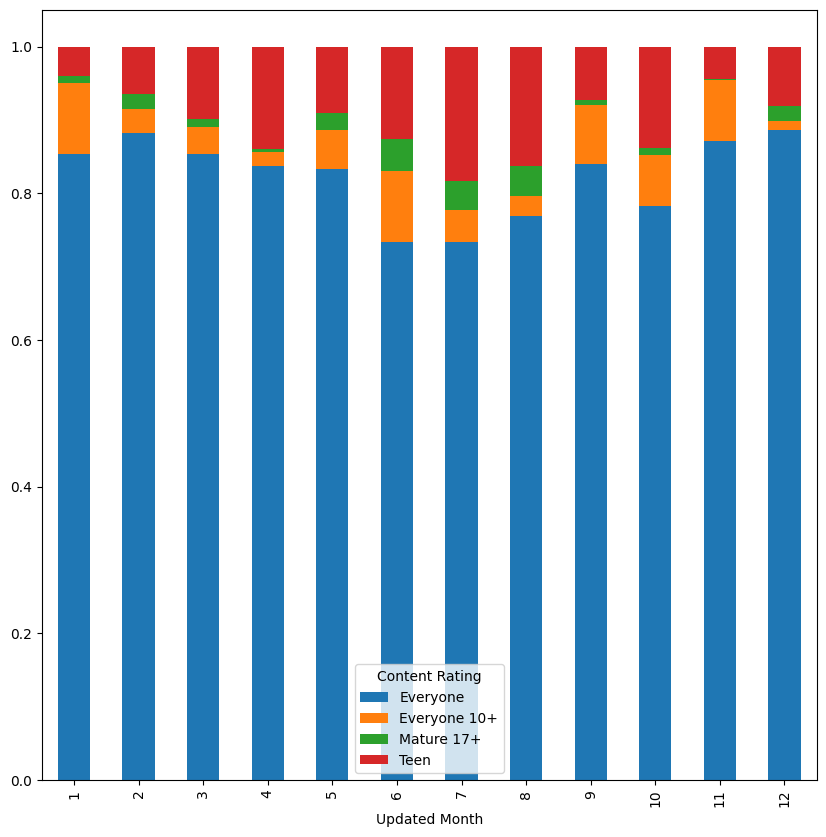

In [ ]:
monthlyivscr.plot(kind="bar",stacked="True",figsize=(10,10))
plt.show()
# Step-by-step explanation of what we did:

# 1) Goal:
#    - Understand month-wise total installs, split by Content Rating.
#    - i.e., for each Updated Month, how many installs come from Everyone / Teen / etc.

# 2) Create a pivot table (summary table):
#    monthlyivscr = pd.pivot_table(
#        data=pldf,
#        values="Installs",           # the numeric column we want to summarize
#        index="Updated Month",       # rows = months (1 to 12)
#        columns="Content Rating",    # columns = content rating categories
#        aggfunc=sum                  # combine multiple rows by summing installs
#    )
#    - Output: a matrix where each cell = TOTAL installs for that (month, content rating).

# 3) Plot the pivot table as a stacked bar chart (absolute numbers):
#    monthlyivscr.plot(kind="bar", stacked=True, figsize=(10,10))
#    - Each month is one bar.
#    - Bar is split into colored sections (Everyone, Teen, etc.).
#    - Height of bar = total installs in that month (absolute volume).

# 4) Why Step X (convert to proportions):
#    - Absolute installs can be misleading because some months may have much higher total installs.
#    - We want to compare the "mix" (percentage share) of content ratings within each month.

# 5) Step X: Convert installs into proportions (row-wise normalization):
#    monthlyivscr = monthlyivscr[["Everyone","Everyone 10+","Mature 17+","Teen"]].apply(
#        lambda x: x / x.sum(), axis=1
#    )
#    - For each month (row), divide each content rating installs by the total installs of that month.
#    - After this, each row sums to 1 (i.e., 100%).

# 6) Plot again as a stacked bar chart (proportions):
#    monthlyivscr.plot(kind="bar", stacked=True, figsize=(10,10))
#    - Now every month’s bar has the same height (1 or 100%).
#    - This plot shows the percentage share of installs for each content rating per month.
#    - Helps detect changes in composition across months (e.g., Teen share higher in some months).


In [ ]:
'''
Here, although you can say that the months June–Aug has the highest number of installs, it is quite difficult to infer anything about the different Content Rating categories.
To overcome this, you set all the different types (Content Rating) of installs in proportion to their monthly installs.
'''

# To create a stacked bar chart, you need to follow these steps:
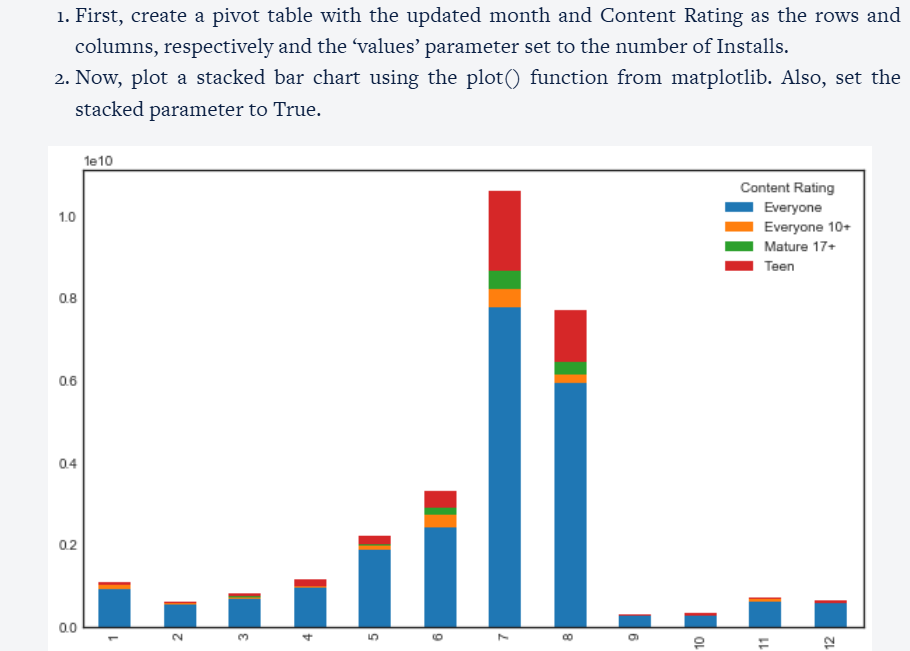

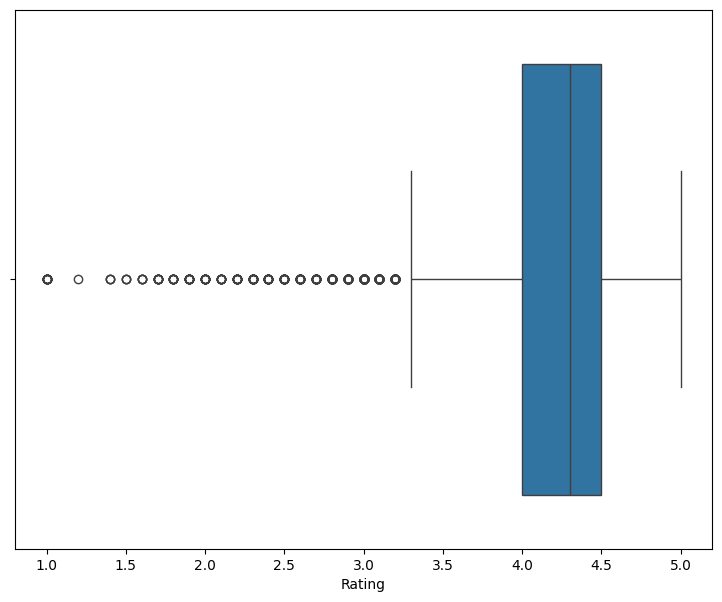

In [ ]:
#Question:
'''
Capping
Plot a box plot for the Rating column . The lower fence gets capped between which of the following?


'''
#Answer:
#lets make a box plot for each category
plt.figure(figsize=[9,7])
sns.boxplot(x=pldf["Rating"])
plt.show()


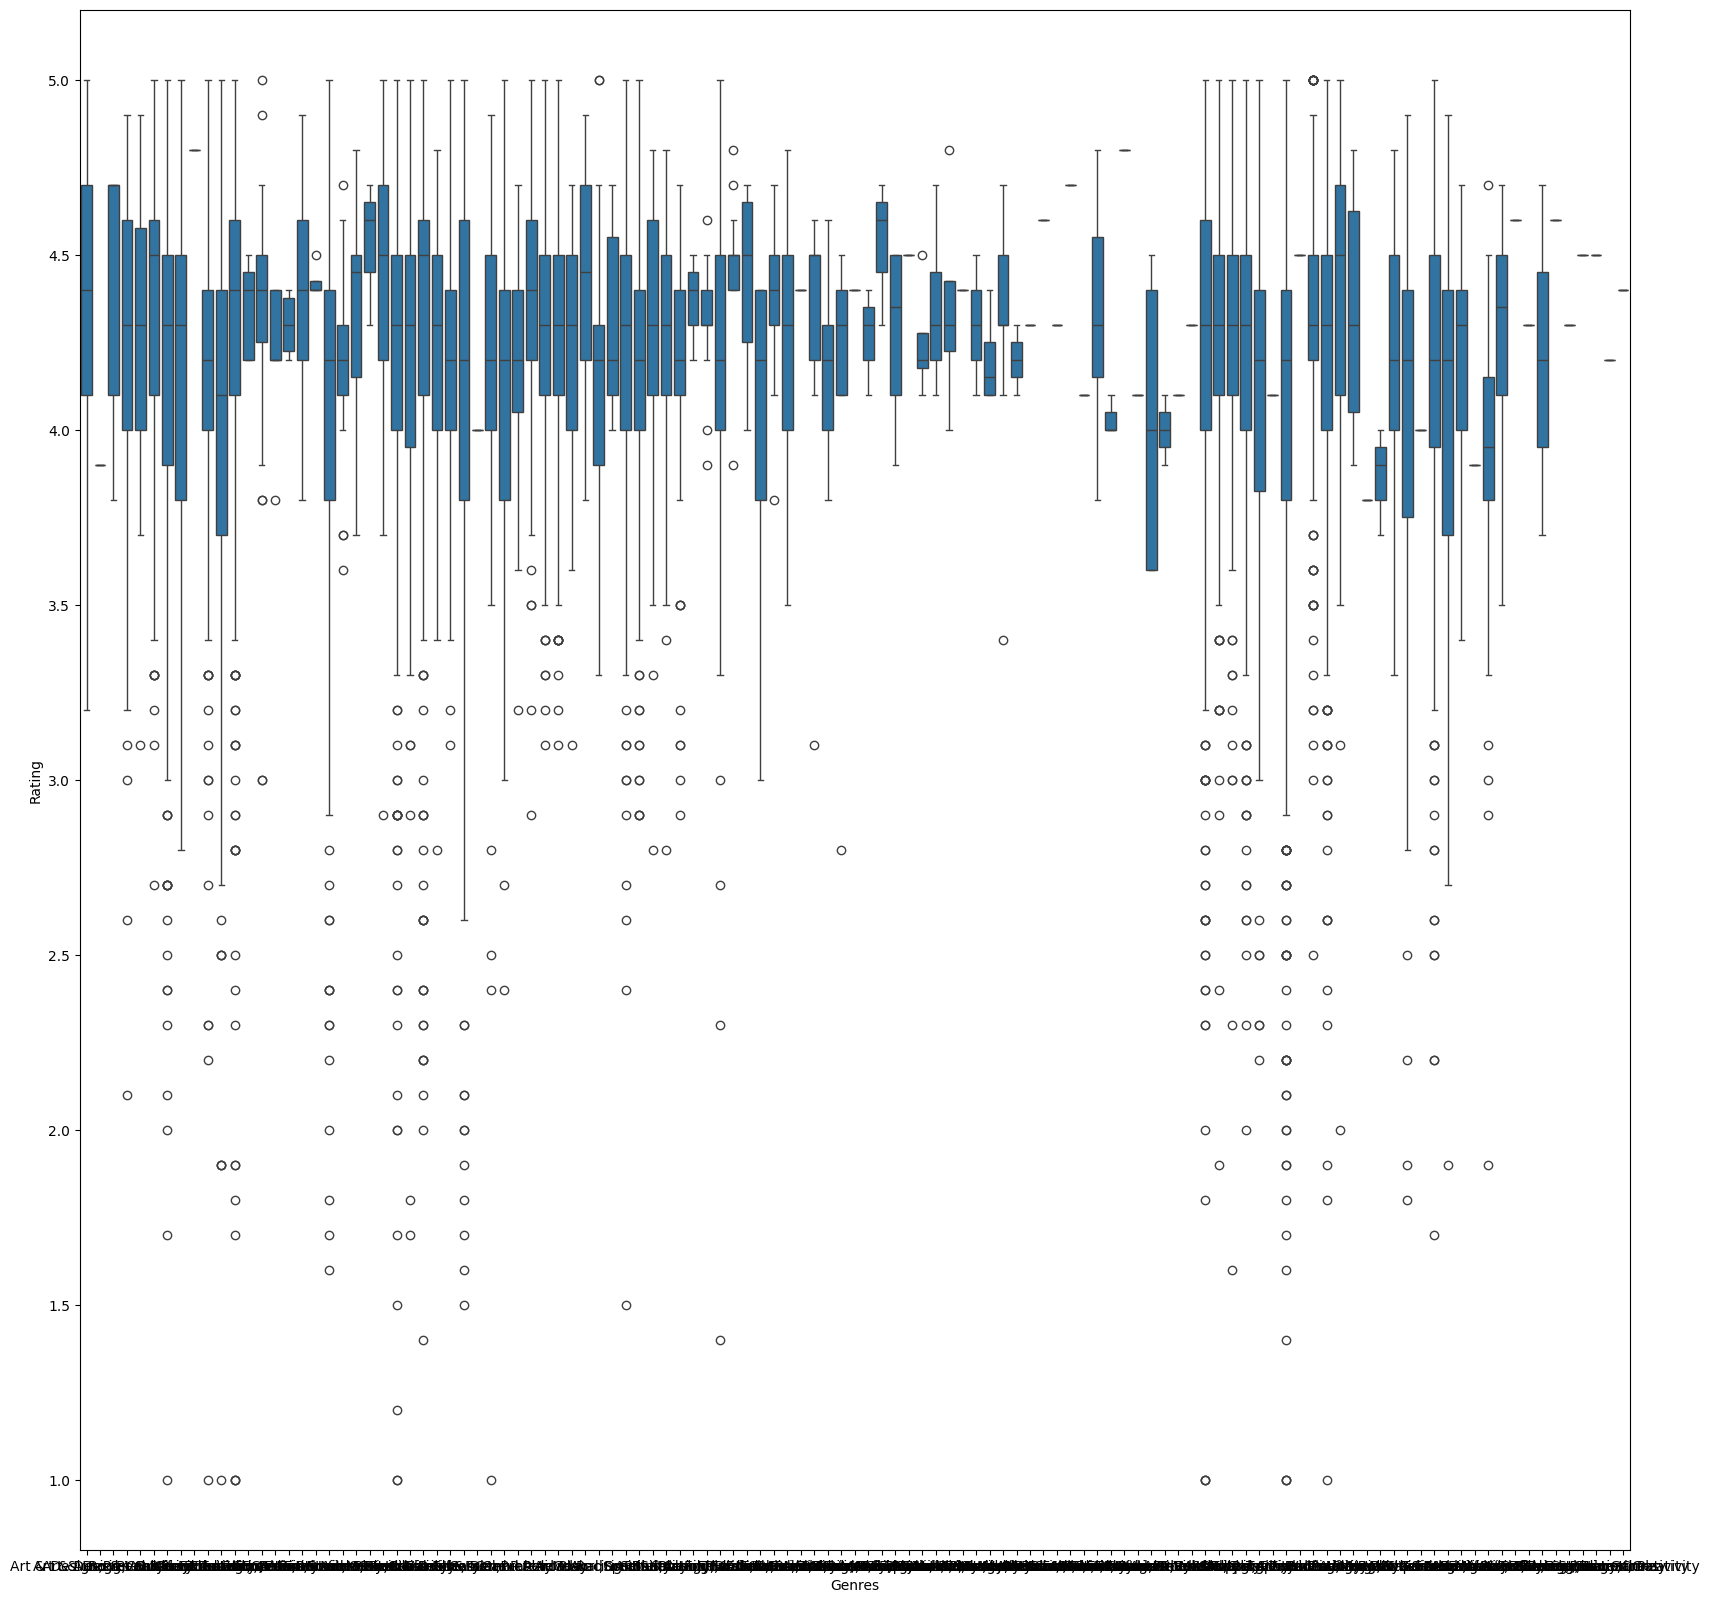

In [ ]:
#Question
'''
Lower Fence
Plot a box plot for the four most popular Genres, and select the Genre having the highest Rating at the lower fence from the following options.
'''
#Answer:
#lets make a box plot for each category
plt.figure(figsize=[20,20])
sns.boxplot(x=pldf["Genres"],y=pldf["Rating"])
plt.show()


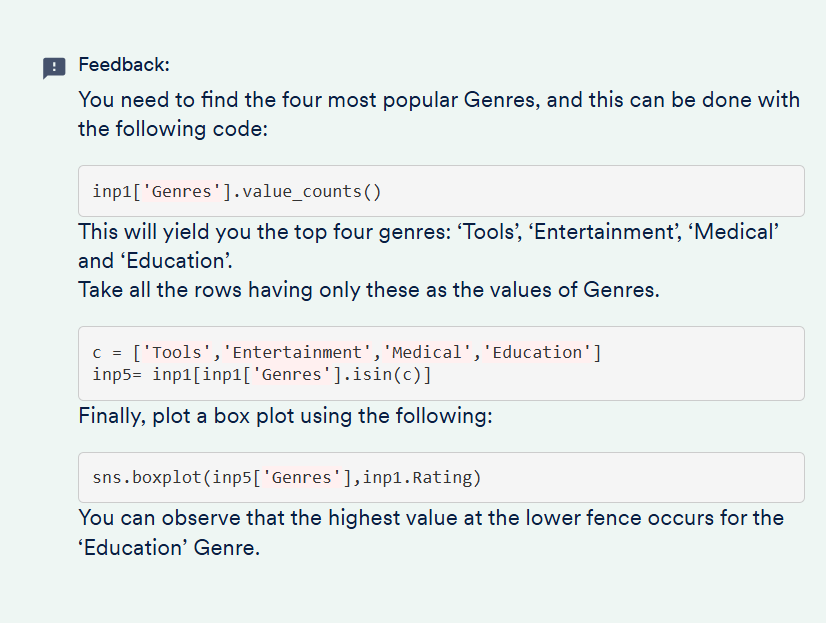

The answer is given in the above image

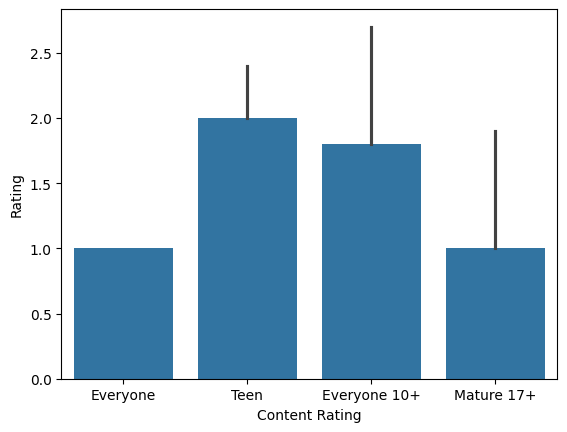

In [ ]:
#Question
'''
Estimator
Change the estimator function in the graph above to
analyse minimum Rating for each of the different categories of ‘Content Rating’.
Which category has the highest minimum rating?
 '''
 #Answer
sns.barplot(data=pldf,x="Content Rating",y="Rating",estimator=lambda x:np.min(x))
plt.show()#lets change the estimator to check the lower end vlues at less percentile


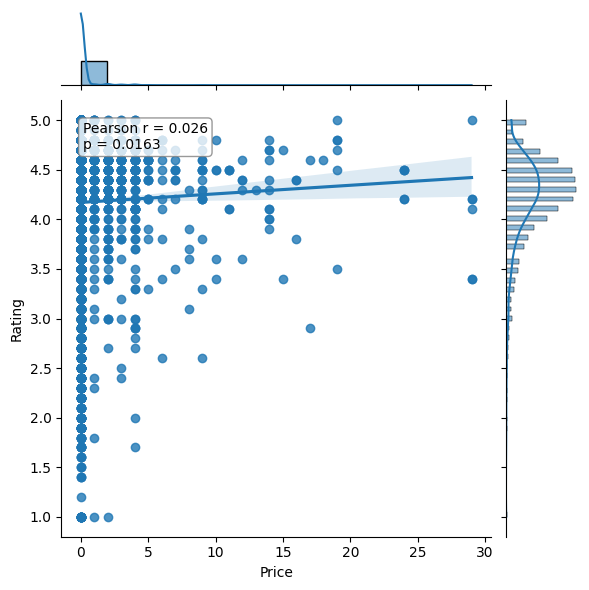

In [ ]:
#Question find ppearson coefficient
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# drop missing values (important for pearsonr)
df_xy = pldf[['Price', 'Rating']].dropna()

r, p = pearsonr(df_xy['Price'], df_xy['Rating'])

g = sns.jointplot(data=df_xy, x="Price", y="Rating", kind="reg")

# Put Pearson r on the plot (inside the joint axes, near the top-left)
g.ax_joint.annotate(
    f"Pearson r = {r:.3f}\np = {p:.3g}",
    xy=(0.05, 0.95), xycoords="axes fraction",
    ha="left", va="top",
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)
)

plt.show()


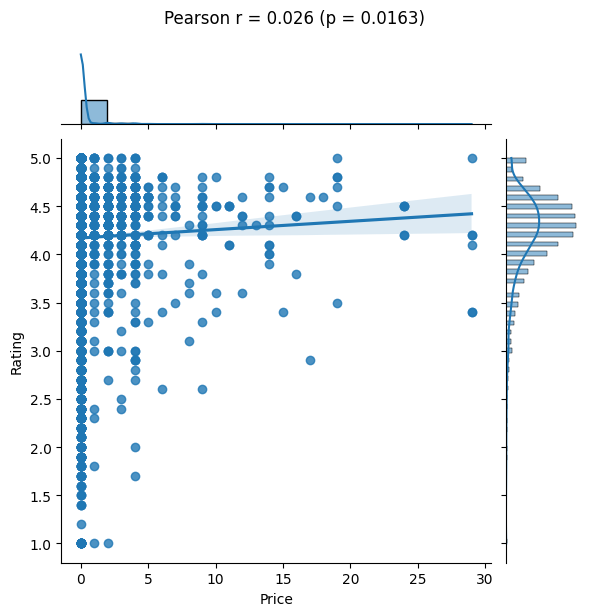

In [ ]:
g = sns.jointplot(data=df_xy, x="Price", y="Rating", kind="reg")
g.fig.suptitle(f"Pearson r = {r:.3f} (p = {p:.3g})", y=1.02)
g.fig.subplots_adjust(top=0.95)
plt.show()


In [ ]:
#Can alsp be answered in the following way

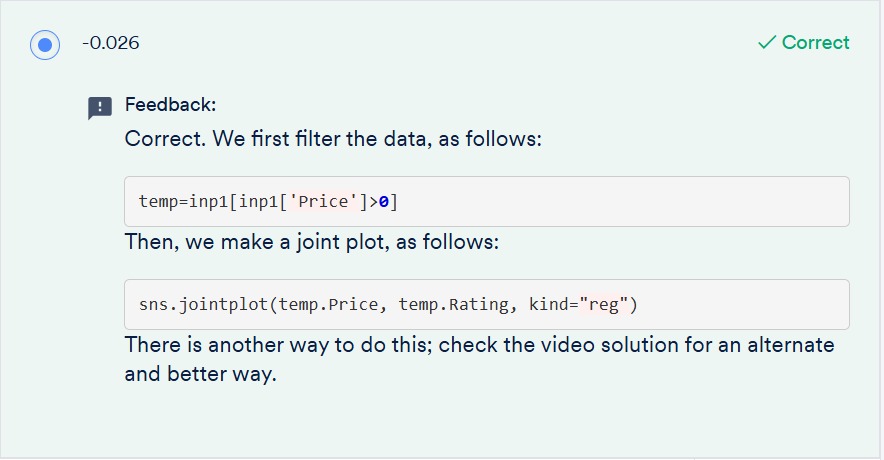

In [ ]:
#Things needed to learn is that
#1.its easy to get a regression plot in seaborn
#2.it shows a positive slope

In [ ]:
#Question
sns.jointplot(x=pldf.Size, y=pldf.Rating, kind = 'kde',color = 'g')

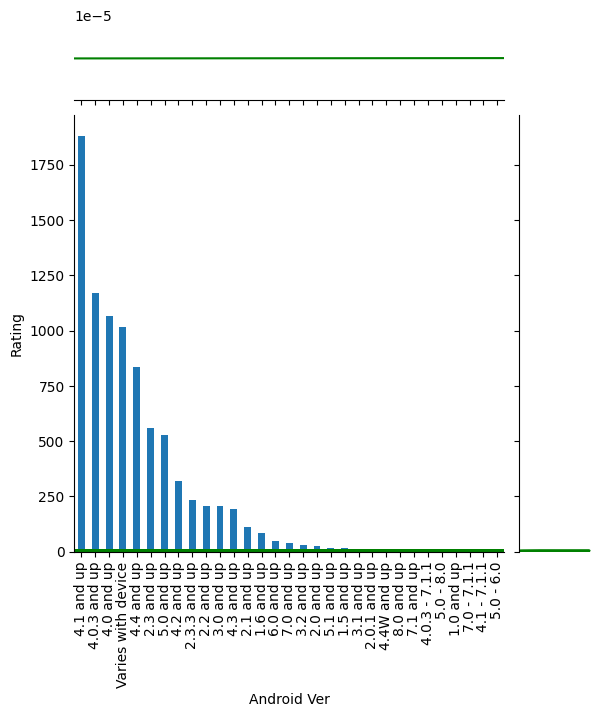

In [ ]:
#Question
#Bar Plot
#Plot a bar plot for apps belonging to different types of ‘Android Ver’ and select the category at the fourth highest peak.
pldf["Android Ver"].value_counts().plot.bar()
plt.show()

In [ ]:
#Questions
vrdf=pd.read_csv("/content/virat.csv")

In [ ]:
vrdf

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08
...,...,...,...,...,...,...,...,...,...,...,...,...
127,45,64,51,2,1,88.23,3,caught,2,v New Zealand,Ranchi,26-Oct-16
128,65,152,76,2,1,85.52,3,caught,1,v New Zealand,Visakhapatnam,29-Oct-16
129,122,147,105,8,5,116.19,3,caught,2,v England,Pune,15-Jan-17
130,8,6,5,2,0,160,3,caught,1,v England,Cuttack,19-Jan-17


In [ ]:
#Question
#Spread in Runs
#Analyse Virat’s run distribution over all of his matches and report the difference between the 50th percentile and 25th percentile scores.

#[Hint: You might observe that some of the scores have an asterisk (*) associated with them, indicating that Virat was Not Out in those matches.]

In [ ]:
vrdf["Runs"].value_counts()

,count
Runs,
0,10
2,5
37,4
31,4
9,4
...,...
154*,1
45,1
65,1


In [ ]:
vrdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Runs        132 non-null    object
 1   Mins        132 non-null    object
 2   BF          132 non-null    int64 
 3   4s          132 non-null    int64 
 4   6s          132 non-null    int64 
 5   SR          132 non-null    object
 6   Pos         132 non-null    int64 
 7   Dismissal   132 non-null    object
 8   Inns        132 non-null    int64 
 9   Opposition  132 non-null    object
 10  Ground      132 non-null    object
 11  Start Date  132 non-null    object
dtypes: int64(5), object(7)
memory usage: 12.5+ KB


In [ ]:
vrdf["Runs"] = vrdf["Runs"].apply(lambda x: int(x.replace("*","")) if "*" in x else int(x))

In [ ]:
vrdf["Runs"].value_counts()

,count
Runs,
0,10
2,6
1,5
31,4
9,4
...,...
154,1
45,1
65,1


In [ ]:
vrdf["Runs"].describe()


,Runs
count,132.000000
mean,46.848485
std,41.994635
min,0.000000
25%,10.000000
50%,32.500000
75%,80.250000
max,154.000000


In [ ]:
vrdf['Runs'].describe(percentiles = [0.25,0.5,1])

,Runs
count,132.000000
mean,46.848485
std,41.994635
min,0.000000
25%,10.000000
50%,32.500000
100%,154.000000
max,154.000000


In [ ]:
#Question:Plot a box plot to analyse the spread of Runs that Virat has scored. The upper fence in the box plot lies in which interval?

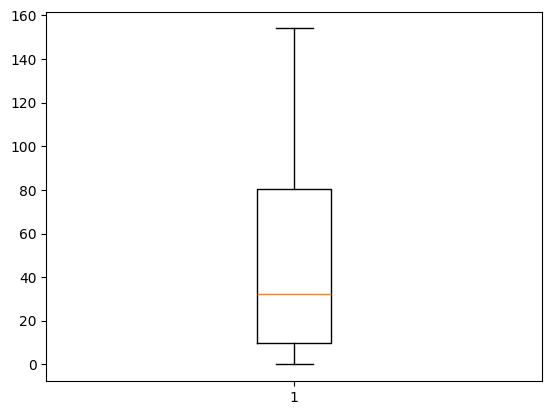

In [ ]:
plt.boxplot(vrdf["Runs"])
plt.show()

In [ ]:
#Question
#False Statement
'''
Consider the following sentences and select the most appropriate response.

I: Virat Kohli played the most matches in 2011.

II: In 2017, Virat Kohli had the highest run average.

III: Virat Kohli had the best score in a single match and the highest run average in the same year,i.e., 2016, across all years.

Which of the following assertions is incorrect?


[Hint: For solving this question, you must extract the year from the ‘Start Date’ column and store it in a separate column before proceeding to verify each of the above-mentioned statements.]'''

'\nConsider the following sentences and select the most appropriate response.\n\nI: Virat Kohli played the most matches in 2011.\n\nII: In 2017, Virat Kohli had the highest run average.\n\nIII: Virat Kohli had the best score in a single match and the highest run average in the same year,i.e., 2016, across all years.\n\nWhich of the following assertions is incorrect?\n\n\n[Hint: For solving this question, you must extract the year from the ‘Start Date’ column and store it in a separate column before proceeding to verify each of the above-mentioned statements.]'

In [ ]:
vrdf.head(50)

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08
5,2,6,2,0,0,100,7,not out,1,v Sri Lanka,Colombo (RPS),14-Sep-09
6,30,53,41,3,0,73.17,4,caught,2,v Australia,Vadodara,25-Oct-09
7,10,32,16,1,0,62.5,3,caught,2,v Australia,Mohali,2-Nov-09
8,27,20,19,4,0,142.1,7,bowled,1,v Sri Lanka,Rajkot,15-Dec-09
9,54,93,65,7,0,83.07,4,lbw,1,v Sri Lanka,Nagpur,18-Dec-09


In [ ]:
vrdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Runs        132 non-null    int64 
 1   Mins        132 non-null    object
 2   BF          132 non-null    int64 
 3   4s          132 non-null    int64 
 4   6s          132 non-null    int64 
 5   SR          132 non-null    object
 6   Pos         132 non-null    int64 
 7   Dismissal   132 non-null    object
 8   Inns        132 non-null    int64 
 9   Opposition  132 non-null    object
 10  Ground      132 non-null    object
 11  Start Date  132 non-null    object
dtypes: int64(6), object(6)
memory usage: 12.5+ KB


In [ ]:
vrdf["Exact_Date"]=vrdf["Start Date"].apply(lambda x: x[:-2] + "20" + x[-2:])

In [ ]:
vrdf

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Exact_Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08,18-Aug-2008
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08,20-Aug-2008
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08,24-Aug-2008
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08,27-Aug-2008
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08,29-Aug-2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,45,64,51,2,1,88.23,3,caught,2,v New Zealand,Ranchi,26-Oct-16,26-Oct-2016
128,65,152,76,2,1,85.52,3,caught,1,v New Zealand,Visakhapatnam,29-Oct-16,29-Oct-2016
129,122,147,105,8,5,116.19,3,caught,2,v England,Pune,15-Jan-17,15-Jan-2017
130,8,6,5,2,0,160,3,caught,1,v England,Cuttack,19-Jan-17,19-Jan-2017


In [ ]:
vrdf.info()#our derived column is string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Runs        132 non-null    int64 
 1   Mins        132 non-null    object
 2   BF          132 non-null    int64 
 3   4s          132 non-null    int64 
 4   6s          132 non-null    int64 
 5   SR          132 non-null    object
 6   Pos         132 non-null    int64 
 7   Dismissal   132 non-null    object
 8   Inns        132 non-null    int64 
 9   Opposition  132 non-null    object
 10  Ground      132 non-null    object
 11  Start Date  132 non-null    object
 12  Exact_Date  132 non-null    object
dtypes: int64(6), object(7)
memory usage: 13.5+ KB


In [ ]:
vrdf["Exact_Date"] = pd.to_datetime(vrdf["Exact_Date"], format="%d-%b-%Y")

In [ ]:
vrdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Runs        132 non-null    int64         
 1   Mins        132 non-null    object        
 2   BF          132 non-null    int64         
 3   4s          132 non-null    int64         
 4   6s          132 non-null    int64         
 5   SR          132 non-null    object        
 6   Pos         132 non-null    int64         
 7   Dismissal   132 non-null    object        
 8   Inns        132 non-null    int64         
 9   Opposition  132 non-null    object        
 10  Ground      132 non-null    object        
 11  Start Date  132 non-null    object        
 12  Exact_Date  132 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 13.5+ KB


In [ ]:
vrdf["Year"] = vrdf["Exact_Date"].astype(str).str[0:4]
vrdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Runs        132 non-null    int64         
 1   Mins        132 non-null    object        
 2   BF          132 non-null    int64         
 3   4s          132 non-null    int64         
 4   6s          132 non-null    int64         
 5   SR          132 non-null    object        
 6   Pos         132 non-null    int64         
 7   Dismissal   132 non-null    object        
 8   Inns        132 non-null    int64         
 9   Opposition  132 non-null    object        
 10  Ground      132 non-null    object        
 11  Start Date  132 non-null    object        
 12  Exact_Date  132 non-null    datetime64[ns]
 13  Year        132 non-null    object        
dtypes: datetime64[ns](1), int64(6), object(7)
memory usage: 14.6+ KB


In [ ]:
vrdf

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Exact_Date,Year
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08,2008-08-18,2008
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08,2008-08-20,2008
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08,2008-08-24,2008
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08,2008-08-27,2008
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08,2008-08-29,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,45,64,51,2,1,88.23,3,caught,2,v New Zealand,Ranchi,26-Oct-16,2016-10-26,2016
128,65,152,76,2,1,85.52,3,caught,1,v New Zealand,Visakhapatnam,29-Oct-16,2016-10-29,2016
129,122,147,105,8,5,116.19,3,caught,2,v England,Pune,15-Jan-17,2017-01-15,2017
130,8,6,5,2,0,160,3,caught,1,v England,Cuttack,19-Jan-17,2017-01-19,2017


In [ ]:
#lets check this one :I: Virat Kohli played the most matches in 2011.
matches_per_year = vrdf["Year"].value_counts().sort_index()
print(matches_per_year)
#The statement is true

Year
2008     5
2009     6
2010    16
2011    31
2012    11
2013    23
2014    17
2015    10
2016    10
2017     3
Name: count, dtype: int64


In [ ]:
#Lets check this statement
#In 2017, Virat Kohli had the highest run average.
yearly_avg_runs = vrdf.groupby("Year")["Runs"].mean()
print(yearly_avg_runs)
#THIS STATEMENT IS FALSE


Year
2008    31.800000
2009    38.333333
2010    45.375000
2011    42.000000
2012    40.363636
2013    47.826087
2014    58.529412
2015    30.400000
2016    73.900000
2017    61.666667
Name: Runs, dtype: float64


In [ ]:
#Virat Kohli had the best score in a single match and the highest run average in the same year,i.e., 2016, across all years.
#LETS CHECK THIS STATEMENT
best_score_per_year = vrdf.groupby("Year")["Runs"].max()
print(best_score_per_year)
best_score_per_year.idxmax(), best_score_per_year.max()


Year
2008     54
2009    107
2010    118
2011    117
2012    128
2013    115
2014    139
2015    138
2016    154
2017    122
Name: Runs, dtype: int64


('2016', 154)

In [ ]:
avg_runs_per_year = vrdf.groupby("Year")["Runs"].mean()
print(avg_runs_per_year)
avg_runs_per_year.idxmax(), avg_runs_per_year.max()


Year
2008    31.800000
2009    38.333333
2010    45.375000
2011    42.000000
2012    40.363636
2013    47.826087
2014    58.529412
2015    30.400000
2016    73.900000
2017    61.666667
Name: Runs, dtype: float64


('2016', 73.9)

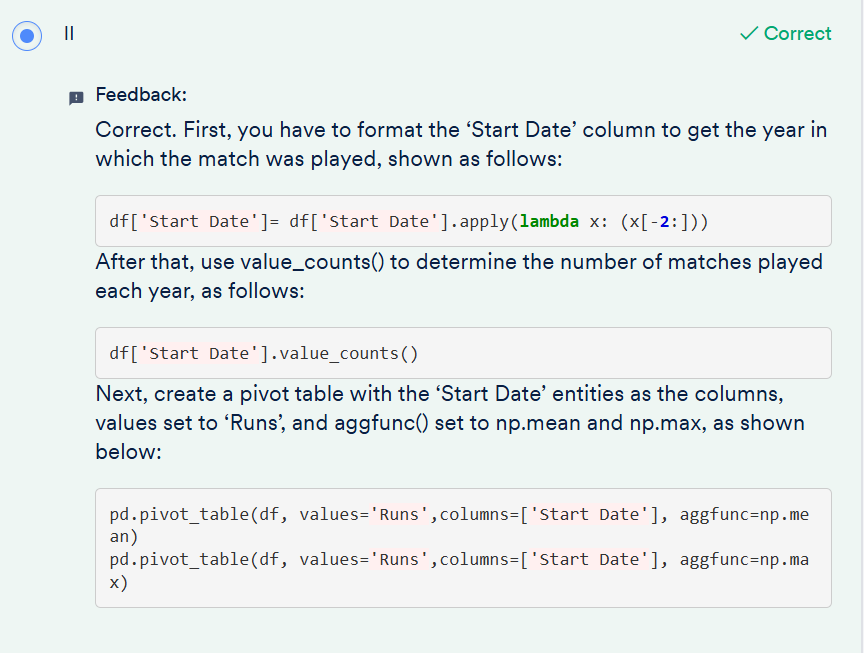

In [ ]:
#Question:#Maximum frequency
'''
Plot a histogram for the Mins column with 15 bins. Which one of the three ranges mentioned below has the highest frequency?

A - [54.6,68)

B - [68,81.4)

C - [121.6,135)
'''

'\nPlot a histogram for the Mins column with 15 bins. Which one of the three ranges mentioned below has the highest frequency?\n\nA - [54.6,68)\n\nB - [68,81.4)\n\nC - [121.6,135)\n'

In [ ]:
vrdf

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Exact_Date,Year
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08,2008-08-18,2008
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08,2008-08-20,2008
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08,2008-08-24,2008
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08,2008-08-27,2008
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08,2008-08-29,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,45,64,51,2,1,88.23,3,caught,2,v New Zealand,Ranchi,26-Oct-16,2016-10-26,2016
128,65,152,76,2,1,85.52,3,caught,1,v New Zealand,Visakhapatnam,29-Oct-16,2016-10-29,2016
129,122,147,105,8,5,116.19,3,caught,2,v England,Pune,15-Jan-17,2017-01-15,2017
130,8,6,5,2,0,160,3,caught,1,v England,Cuttack,19-Jan-17,2017-01-19,2017


In [ ]:
vrdf["Mins"].value_counts()
#we need to remove "-" from the mins column
vrdf["Mins"]=vrdf["Mins"].apply(lambda x:float(0) if ( "-" in x) else float(x))

In [ ]:
vrdf["Mins"]=vrdf["Mins"].astype(float)

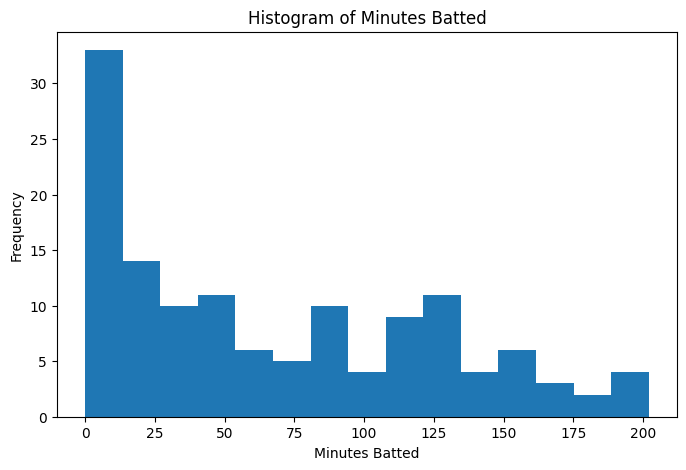

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(vrdf["Mins"], bins=15)
plt.xlabel("Minutes Batted")
plt.ylabel("Frequency")
plt.title("Histogram of Minutes Batted")
plt.show()


In [ ]:
vrdf["Mins"]=vrdf["Mins"].astype(float)
A = vrdf[(vrdf["Mins"] >= 54.6) & (vrdf["Mins"] < 68)].shape[0]
B = vrdf[(vrdf["Mins"] >= 68) & (vrdf["Mins"] < 81.4)].shape[0]
C = vrdf[(vrdf["Mins"] >= 121.6) & (vrdf["Mins"] < 135)].shape[0]

print("Range A [54.6, 68):", A)
print("Range B [68, 81.4):", B)
print("Range C [121.6, 135):", C)


Range A [54.6, 68): 6
Range B [68, 81.4): 6
Range C [121.6, 135): 11


In [ ]:
#Answer is C [121.6, 135)

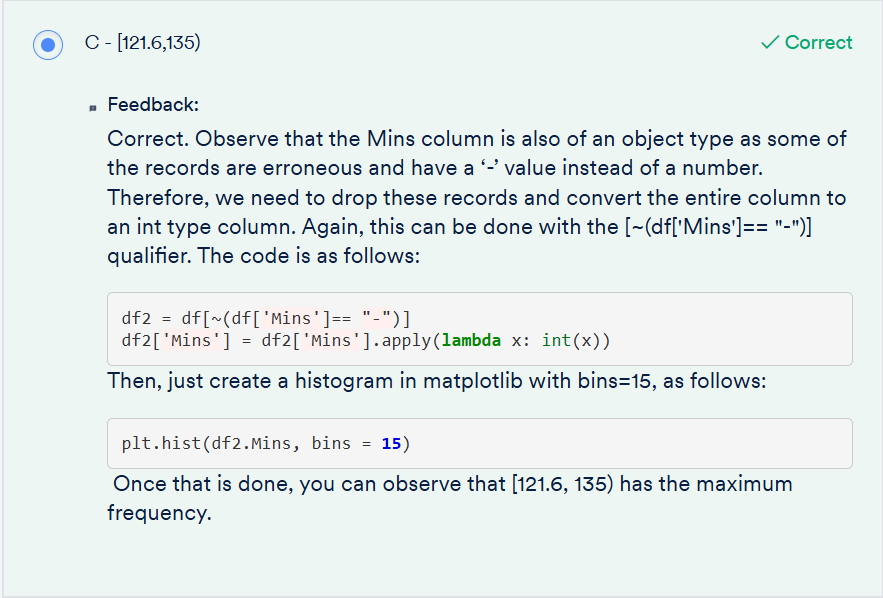

In [ ]:
#Lets answer the business questions using the visualization with the seaborn library

In [ ]:
import seaborn as sns

In [ ]:
#answered
sns.distplot(pldf.Rating,kde = False)


<Axes: xlabel='Rating'>

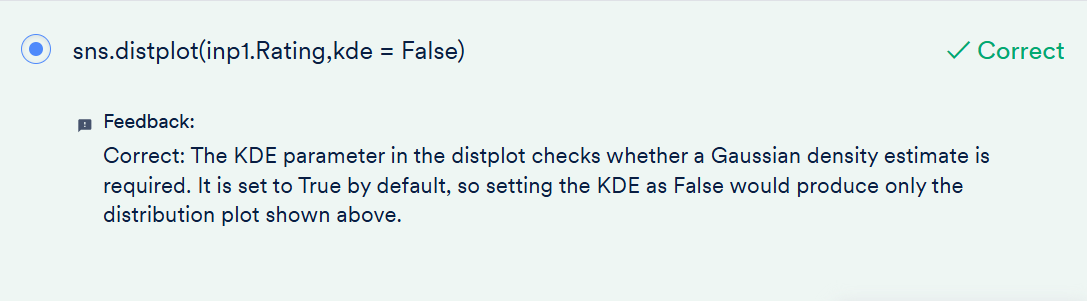

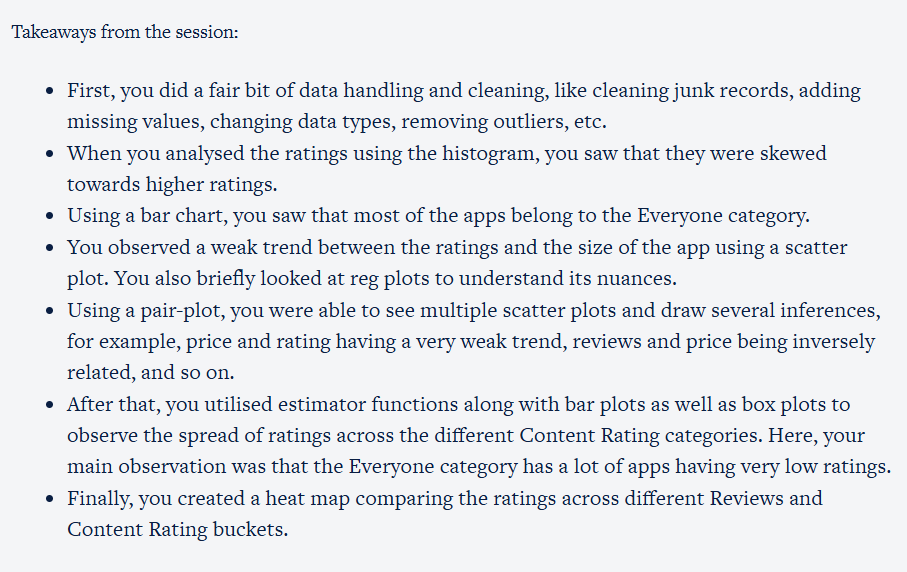